<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 4, 2020 -->
# Project 1 on Machine Learning, deadline October 4, 2020
<!-- dom:AUTHOR: [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html) at University of Oslo, Norway -->
<!-- Author: -->  
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **Sep 10, 2021**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
The total score is **100** points. Each subtask has its own final score.


We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.


The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as
a resampling technique.  After that we will include the cross-validation technique. As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for $x$ and $y$, or as in
the example below just a set of fixed 
values for $x$ and $y$ with a given step
size.  We will fit a
function (for example a polynomial) of $x$ and $y$.  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.


The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

In [1]:
from IPython.display import display
from IPython.display import Markdown as md
#%matplotlib inline

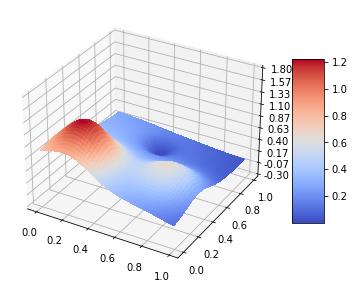

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Make data.
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y, noise_std=1, add_noise=False):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    np.random.seed(1436) # Use same random number generator
    noise = 0.4*np.random.normal(0, noise_std, (len(x),len(y))) if add_noise else 0
    return term1 + term2 + term3 + term4 + noise

noise_std = 1
z = FrankeFunction(x, y, noise_std)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[6,6])

def plot_Franke(fig, ax, x, y, z, alpha=1, clr=cm.coolwarm):

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=clr, alpha=alpha,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.30, 1.80)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
plot_Franke(fig, ax, x, y, z)
plt.show()

### Exercise 1: Ordinary Least Square (OLS) on the Franke function (score 10 points)

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $\cal{N}(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in $x$ and $y$ up to fifth order. Find the
[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) of the parameters (estimators) $\beta$ by computing their
variances, evaluate the Mean Squared error (MSE)

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\hat{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Your code has to include a scaling of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.


You can easily reuse the solutions to your exercises from week 35 and week 36.

### Answer:

This exercise concerns the ability of a polynomial function of two dimensional input data $(x, y)$ to fit a two dimensional target function, generated from the same two input variables. Polynomials are smooth, well-behaved functions, and expanding input data with polynomial features is a feasible process. Thus, if the addition of polynomial features proves to increase the accuracy of the fit, it is certainly a method worthy to implement.

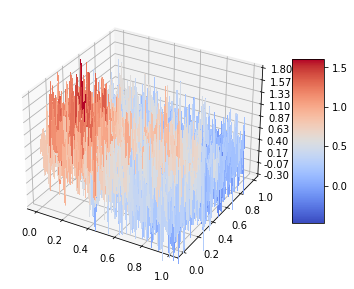

In [3]:
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y, noise_std, add_noise=True)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[6,6])
plot_Franke(fig, ax, x, y, z)

Noisy FrankeFunction | Scaled noisy FrankeFunction
- | -
![alt](figs_v3/ex1_Franke_noise.png) | ![alt](figs_v3/ex1_Franke_scaled_noise.png)

The addition of a standard normal distributed noise to the FrankeFunction causes significant deviations from the original output, as shown in the figure above. Consequently, the new output values greatly exceed the original interval of about $[0,\:1]$, with multiple outliers. The extreme variations can raise some problems when fitting a model. The right figure shows the same standard normal distributed noise but scaled by $0.4$. This reduces the extreme fluctuations while still maintaining significant noise. Thus, we are using this particular noisy FrankeFunction as basis because it better represents the true FrankeFunction while still imposing some challenges with the noise. To disclose this challenge, one can scale the data and check for performance improvements. The following code blocks generate the OLS algorith and error statistics, add polynomial features, test the implementations and eventually runs them.

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import pandas as pd

In [5]:
def xyz_1D(n_points):
    """Create mesh from inputs, and reshape inputs and outputs to vectors.
    """
    x = np.arange(0, 1, 1/n_points)
    y = np.arange(0, 1, 1/n_points)
    x, y = np.meshgrid(x, y)

    x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
    y_1d = np.ravel(y).reshape(np.size(y), 1)
    x_y = np.hstack((x_1d, y_1d))

    z = FrankeFunction(x, y, noise_std, add_noise=True)
    z_1d = np.ravel(z) # Convert to 1d vector to make it compatible with new matrix x_y
    return x, y, x_y, z_1d

#### Fundamentals for OLS

Notice that we set ```fit_intercept=False```, which means that the intercept in our design matrix is preserved as it is during the fit. For ordinary least squares, whether we decide to include the intercept or not won't affect the error of our fit. However, if we want scikit to handle the intercept through ```fit_intercept=True``` we need to scale our input and output by subtracting the corresponding mean values - in order to reproduce the same results manually. Therefore, to keep things simple, we decide to not bully the intercept.

In [6]:
def OLS_scikit(X, Xpred, y):
    linreg = LinearRegression(fit_intercept=False)
    linreg.fit(X, y)
    beta = linreg.coef_
    inv_cov = np.linalg.pinv(X.T @ X)
    y_pred = linreg.predict(Xpred)
    return y_pred, inv_cov, beta

In [7]:
def OLS_self(X, Xpred, y):
    inv_cov = np.linalg.pinv(X.T @ X)
    beta = inv_cov @ X.T @ y # Use pinv to resolve problem inverting singular matrices
    ypred = Xpred @ beta
    return ypred, inv_cov, beta

In [8]:
def R2(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def MSE(y_true, y_pred):
    n = np.size(y_pred)
    return np.sum((y_true-y_pred)**2)/n

In [9]:
def create_X(x, y, n):
    """Create design matrix consisting of polynomial features of x and y, up to degree n.
    Args:
        x (array): 2D-array of x-coordinates
        y (array): 2D-array of y-coordinates
        n (int): number of polynomial degrees
    Returns:
        (array): 2D-array of polynomial features of x and y
        
    """
    if len(x.shape) > 1: # Reduce vectors to 1D
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta (x, y, xy, x*x, ...)
    X = np.ones((N,l)) # (inputs, features)

    for i in range(1, n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k) # Insert all 2D polynomial features (in total l columns assigned)
    
    return X

In [10]:
def scaling_train_test(scale, train, test):
    scl = scale()
    scl.fit(train)
    train_scaled = scl.transform(train)
    test_scaled = scl.transform(test) # Scale test set using same statistical parameters as for train set
    return train_scaled, test_scaled

In [11]:
def centering(x_train, x_test):
    x_train_scaled = x_train - np.mean(x_train, axis=0)
    x_test_scaled = x_test - np.mean(x_train, axis=0) 
    return x_train_scaled, x_test_scaled

#### Test of implementation

In the implementing my own code for OLS I have used the pseudo-inverse to invert the matrix $X^T X$ to avoid issues with potential singularities. The pseudo-inverse utilizes the singular value decomposition behind the scenes. To check if the inversion process is as expected, I compare with scikit's own inversion functionality.

In [12]:
def test_error_implementation():
    """Test to see if error scores are implemented correctly,
    compared with scikit's error functions.
    """
    y_true = np.array([3.56, 7.5, 6.13])
    y_pred = np.array([4.22, 7.9, 6.01])
    mse_self = MSE(y_true, y_pred)
    mse_scikit = mean_squared_error(y_true, y_pred)
    r2_self = R2(y_true, y_pred)
    r2_scikit = r2_score(y_true, y_pred)
    
    assert np.allclose(mse_self, mse_scikit)
    assert np.allclose(r2_self, r2_scikit)
    
test_error_implementation()

In [13]:
def test_centering():
    x, y, x_y, z = xyz_1D(20)
    X_train, X_test, z_train, z_test = train_test_split(x_y, z)

    std = StandardScaler(with_std=False)
    std.fit(X_train)
    X_train1 = std.transform(X_train)
    X_test1 = std.transform(X_test)

    X_train2, X_test2 = centering(X_train, X_test)

    assert np.allclose(X_train1, X_train2)
    assert np.allclose(X_test1, X_test2)
    
test_centering()

In [14]:
def test_design_matrix():
    n = 3
    x = np.arange(0, 1, 0.1)
    y = np.arange(0, 0.5, 0.05)
    X_own = create_X(x, y, n)
    
    poly = PolynomialFeatures(degree=n)
    X_scikit = poly.fit_transform(np.vstack([x,y]).T)
    
    assert X_own.shape == X_scikit.shape # Check that the methods include same polynomial features
    
    for col in range(len(X_own)):
        assert np.allclose(X_own[col], X_scikit[col]) # Check that polynomial features match for each vector
    
test_design_matrix()

In [15]:
def test_OLS_implementation():
    x, y, x_y, z_1d = xyz_1D(50)

    X = create_X(x_y[:,0], x_y[:,1], 5)
    X_train, X_test, z_train, z_test = train_test_split(X, z_1d, test_size=0.2, random_state=2020)

    X_train, X_test = scaling_train_test(StandardScaler, X_train, X_test)

    z_tilde, inv_cov, beta = OLS_scikit(X_train, X_train, z_train)
    z_pred, _, _ = OLS_scikit(X_train, X_test, z_train) # Training on same data set, so beta is same as above

    z_tilde2, inv_cov2, beta2 = OLS_self(X_train, X_train, z_train)
    z_pred2, _, _ = OLS_self(X_train, X_test, z_train)
    
    assert np.allclose(z_tilde, z_tilde2)
    assert np.allclose(beta, beta2)
    assert np.allclose(z_pred, z_pred2)
    
test_OLS_implementation()

#### OLS algorithm

In [16]:
def run_OLS(x_y, z, nr_deg, scale=None):
    """Run OLS on input data x and y and targets z.
    Args:
        x, y (array): 1D arrays of coordinates
        z (array): 1D array of target values
    Returns:
        
    """
    X = create_X(x_y[:,0], x_y[:,1], nr_deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020)
    
    if scale=='centering':
        X_train, X_test = centering(X_train, X_test)
    elif scale is not None:
        X_train, X_test = scaling_train_test(scale, X_train, X_test)
        
    z_tilde, inv_cov, beta = OLS_scikit(X_train, X_train, z_train)
    z_pred, _, _ = OLS_scikit(X_train, X_test, z_train) # Training on same data set, so beta is same as above
    
    return z_train, z_test, z_tilde, z_pred, beta, inv_cov

In [17]:
def OLS_get_stats(z_train, z_test, z_tilde, z_pred, betas, inv_cov):
    """Calculate error measures (MSE and R2) for given predictions and targets,
    and the confidence interval of the mean optimal parameter beta.
    
    """
    mse_train = MSE(z_train, z_tilde)
    mse_test = MSE(z_test, z_pred)
    r2_train = R2(z_train, z_tilde)
    r2_test = R2(z_test, z_pred)
    
    errors = np.array([round(mse_train, 5), round(mse_test, 5), round(r2_train, 5), round(r2_test, 5)])
    
    cov_betas = noise_std**2*inv_cov # Analytical expression for the covariance of beta
    var_betas = np.diag(cov_betas) # Variances are the diagonal entries of covariance matrix
    sigma = np.sqrt(var_betas)
    
    # Use the common two-sigma to define our CI
    CI_lower = betas - 2*sigma 
    CI_upper = betas + 2*sigma 
    
    CI = np.array([[low, up] for low, up in zip(CI_lower, CI_upper)])
    
    return errors, CI

In [18]:
x, y, x_y, z_1d = xyz_1D(50)

Es = {'Unscaled':np.zeros(len(x)), 'StandardScaler':np.zeros(len(x)), \
      'MinMaxScaler':np.zeros(len(x)), 'Centering':np.zeros(len(x))} # Errors
betas = {'Unscaled':np.zeros(len(x)), 'StandardScaler':np.zeros(len(x)), \
         'MinMaxScaler':np.zeros(len(x)), 'Centering':np.zeros(len(x))}
deg = 5

for scaler in StandardScaler, MinMaxScaler, 'centering':
    
    z_train, z_test, z_tilde, z_pred, beta, inv_cov = run_OLS(x_y, z_1d, nr_deg=deg)
    z_train_scale, z_test_scale, z_tilde_scale, z_pred_scale, beta_scale, inv_cov_scale \
                            = run_OLS(x_y, z_1d, nr_deg=deg, scale=scaler)

    E_unscale, _ = OLS_get_stats(z_train, z_test, z_tilde, z_pred, beta, inv_cov)
    E_scale, CI_scale = OLS_get_stats(z_train_scale, z_test_scale, z_tilde_scale, z_pred_scale, \
                                        beta_scale, inv_cov_scale)
        
    if scaler==StandardScaler or scaler==MinMaxScaler:
        Es[scaler.__name__] = E_scale
        betas[scaler.__name__] = beta_scale
        
    else:
        Es['Unscaled'] = E_unscale # Only append unscaled error once
        betas['Unscaled'] = beta
        
        Es['Centering'] = E_scale
        betas['Centering'] = beta_scale
        CI = CI_scale # Only calculate confidence interval when using centered scaling

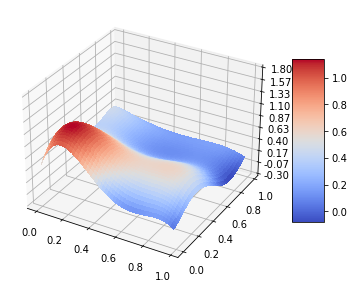

In [19]:
def plot_prediction(fig, ax, x_y, z, beta, deg, clr=cm.coolwarm):
    x_y_new = create_X(x_y[:,0], x_y[:,1], deg)
    x_y_new, _ = centering(x_y_new, x_y_new)
    pred = x_y_new @ beta
    pred = pred.reshape(len(x), len(y))
    # Because input data is centered, we must recover mean value
    # of targets and add to prediction
    z_mean = np.mean(z, axis=0)
    
    plot_Franke(fig, ax, x, y, pred+z_mean, clr=clr)
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[6,6])
plot_prediction(fig, ax, x_y, z_1d, beta, deg)
#plt.show()

Degree 2 | Degree 5 | Degree 10
- | - | -
![alt](figs_v3/ex1_plot_deg2.png) | ![alt](figs_v3/ex1_plot_deg5.png) |![alt](figs_v3/ex1_plot_deg10.png)

The three plots above show reproduced FrankeFunctions from the trained model for polynomial degrees 2, 5 and 10, respectively. It is clear that a fitted polynomial of degree two is too simplistic and unable to capture the characteristics of the FrankeFunction. On the other hand, a fifth order polynomial seems to be a good fit, because it interpolates rather well with the true FrankeFunction. Lastly, the fitted tenth order polynomial is a worse fit, as it contains too severe fluctuations and spikes that causes overfitting. Conclusively, this visual interpretation gives an indication of what model to select.

In [20]:
E = pd.DataFrame(np.vstack([Es['Unscaled'], Es['StandardScaler'], Es['MinMaxScaler'], Es['Centering']]))
E.rename(columns={0:'MSE train', 1:'MSE test', 2:'R2 train', 3:'R2 test'}, inplace=True)
E.index = ['Unscaled', 'StandardScaler', 'MinMaxScaler', 'Centering']
E

,MSE train,MSE test,R2 train,R2 test
Unscaled,0.16262,0.15716,0.32699,0.31688
StandardScaler,0.35327,0.33393,-0.46199,-0.45146
MinMaxScaler,0.16368,0.15767,0.32263,0.31469
Centering,0.35327,0.33393,-0.46199,-0.45146


|   | MSE train	| MSE test | R2 train | R2 test  |
|---|-----------|----------|----------|----------|
| **Unscaled** | 0.16262	| 0.15716  | 0.32699  | 0.31688 |
| **StandardScaler**	| 0.35327	| 0.33393  | -0.46199  | -0.45146 |
| **MinMaxScaler**	| 0.16368	| 0.15767  | 0.32263  | 0.31469 | 
| **Centering** | 0.35327 | 0.33393 | -0.46199 | -0.45146 |

The table above shows the calculated MSE and R2 for the unscaled data and scaled data (StandardScaler and MinMaxScaler) for polynomial degree 5. The errors for both training and test data are substantial. This is caused by the random noise added to FrankeFunction, making it less smooth. Thus, higher order polynomials are required to make an accurate fit. 

The general trend is that the scaled data doesn't provide any better error results - they are quite close to the unscaled error and actually slightly worse. The explanation is that the input features $x$ and $y$ can already be considered "scaled", as they are defined uniformly in the interval $[0, \: 1]$. Hence, scaling wth OLS has essentially little to no effect on this dataset. Notice that the MSEs are similar when centering the data and using StandardScaler. The reason is that we defined a noise with standard deviation 1.

It is, however, always a good habit to scale the data before running an algorithm. It will rarely lead to significantly worse results, but will in many cases provide much better results, especially when the input features differ considerably in magnitude. Despite the scaling not providing better performance for this particular dataset, I still choose to scale the data. The recommended scaling is simply to center the data by subtracting the mean value. The reason I don't use StandardScaler is that it could potentially blow up the feature values of our design matrix if their standard deviation is very small. Another reason is that scikit-learn automatically scales the input data by centering it, so that comparing own implemented code with scikit's functionality is feasible.

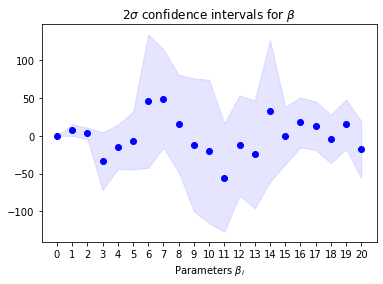

In [21]:
poly_features = np.arange(len(CI))
plt.scatter(poly_features, betas['Centering'], c='b')
plt.fill_between(poly_features, CI[:,0], CI[:,1], color='b', alpha=0.1)
plt.xlabel(r'Parameters $\beta_i$')
plt.title(r'2$\sigma$ confidence intervals for $\beta$')
plt.xticks(range(0, len(poly_features)));

100x100 data points (degree 2) | 1000x1000 data points (degree 2)
- | -
![alt](figs_v3/ex1_CI_deg2_100n.png) | ![alt](figs_v3/ex1_CI_deg2_1000n.png)


100x100 data points (degree 5) | 1000x1000 data points (degree 5)
- | -
![alt](figs_v3/ex1_CI_deg2_100n.png) | ![alt](figs_v3/ex1_CI_deg2_1000n.png)

The two upper and two lower plots above show the confidence intervals for the $\beta$ parameters for polynomial inputs of degree two and five, respectively. The parameters are ordered from their corresponding lowest polynomial order to highest polynomial order (e.g. $[1,\:x,\:y,\: \dots , \:x^4 y, \:x^5, \:y^5]$ for fifth order). The left and right plots are for 100 and 1000 data samples, respectively. 

Comparing polynomial degrees, we see that the confidence intervals for $\beta$s corresponding to polynomial degree two is much narrower than for polynomial degree five (note the different scale of y-axis). A polynomial of degree two is a more general model, fitting only the most general characteristics of our target function. It won't respond well to fluctuations and outliers, hence the predicted output is limited to a smaller region, explaining why the parameters $\beta$ possess low variance.

There is also a noticeable dependency on the number of data samples. Notice the larger span of the confidence intervals in the left plots compared to the right plots (again, note the different scale of y-axis). To explain this, we'll have a look at the formula for the variance of $\beta$:

\begin{equation}
    \text{Var}(\beta) = \sigma_\epsilon^2 (X^T X)^{-1},
\end{equation}

where $\sigma_\epsilon^2$ is the variance of the target values $z$ (given by the random noise in FrankeFunction). The corresponding confidence interval is defined as:

\begin{equation}
     \text{CI} = \big[ \hat{\beta} - 2\sigma, \: \hat{\beta} + 2\sigma \big],
\end{equation}

where $\hat{\beta}$ is the unbiased estimator of the mean value of $\beta$, that is $E[\hat{\beta}] = \hat{\beta}$, and $\sigma$ is the standard deviation of the parameters $\beta$; $\sqrt{\text{Var}(\beta)}$.

We see that a larger variation of noise produces larger variance of the parameters $\beta$, because a more dominant noise will require a more complex model to be fitted, which must be associated with a large fluctuation in the values of $\beta$. Moreover, since the ordered eigenvalues of $X^T X$ correspond to the ordered singular values of $X$, larger singular values will result in lower variance of $\beta$. Hence, the directions of largest singular values provide the most accurate prediction of the optimal values for $\beta$, because the resulting confidence interval will be the narrowest possible.

Thus, the left plot suggests that 100 data points is too few samples for an accurate parameter estimation, especially for this particular model with dominant noise. Including more data points, we have more samples to train our model, mitigating the fluctuations. Thus, we are able to better reproduce the general structure of the data, coinciding with a more "confident" parameter estimation. Even larger variability of the parameters is obtained for 50 data points, as illustrated in [Figure A1](#apx1) in [Appendix](#apx).

### Exercise 2: Bias-variance trade-off and resampling techniques (score 15 points)

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the means
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

Explain what the terms mean, which one is the bias and which one is
the variance and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.

Note also that when you calculate the bias, in all applications you don't know the function values $f_i$. You would hence replace them with the actual data points $y_i$.


### Answer:

Now that we have seen how the addition of polynomial features improves the accuracy of our fitted model to the FrankeFunction, it is of interest to do further analysis on the polynomial degrees. By defining a cost function in terms of the mean squared error (MSE), we can compare the expected loss for different polynomial degrees. The result indicates what model performs best, effectively narrowing our search for the optimal model. Moreover, in the real world input data is limited and reduces the reliability of our results. The bootstrapping method can be used to account for this, by continuously resampling the input data and taking the mean of the individual estimates of MSE.

To reconstruct a figure similar to Figure 2.11 in Hastie, we first run simluations of ordinary least squares by fitting models with different polynomial degrees. Afterwards, we can plot the MSE for both training and test data as a function of model complexity (different polynomial degrees).

In [22]:
def mse_decomposition(data, data_pred):
    mse = np.mean(np.mean((data - data_pred)**2, axis=1, keepdims=True))
    bias = np.mean((data - np.mean(data_pred, axis=1, keepdims=True))**2) # E(data_pred) -> take expected value of each column vector
    variance = np.mean((data_pred - np.mean(data_pred, axis=1, keepdims=True))**2)
    return mse, bias, variance

In [23]:
errors = []
from_deg=1; to_deg=20

x, y, x_y, z_1d = xyz_1D(50)

all_mse = np.zeros(to_deg-from_deg)
all_bias = np.zeros(to_deg-from_deg)
all_variance = np.zeros(to_deg-from_deg)

for deg in range(from_deg, to_deg):
    idx = int(deg-from_deg)
    # Transform z to matrix with one column, to calculate mse properly
    z_train, z_test, z_tilde, z_pred, beta, inv_cov = run_OLS(x_y, z_1d.reshape(-1,1), nr_deg=deg, scale='centering')
    all_mse[idx], all_bias[idx], all_variance[idx] = mse_decomposition(z_test, z_pred)
    E, _ = OLS_get_stats(z_train, z_test, z_tilde, z_pred, beta, inv_cov)
    errors.append(E)

In [24]:
df_error = pd.DataFrame(np.vstack(errors))
df_error.rename(columns={0:'MSE train', 1:'MSE test', 2:'R2 train', 3:'R2 test'}, inplace=True)
df_error.index = range(from_deg, to_deg)

In [83]:
def plot_train_test_error(poly_degs, error_train, error_test, plot_optimal=True, n_samples=False):
    plt.figure(figsize=[10, 5])
    plt.plot(poly_degs, error_train, label='train')
    plt.plot(poly_degs, error_test, label='test')
    plt.ylim([min(np.min(error_train), np.min(error_test)),
              max(np.max(error_train), np.max(error_test))])
    # Stop training at (global) minimum of test MSE
    from_deg = np.min(poly_degs)
    if plot_optimal:
        plt.axvline(x=from_deg+np.argmin(error_test), c='r', linestyle='--', label='optimal model') # index starts from first plotted poly-degree
    plt.xlabel('Polynomial degree')
    plt.ylabel(f'{error_train.name.split(" ")[0]}')
    if n_samples:
        plt.title(f'{error_train.name.split(" ")[0]} \
                    as function of model complexity, n={n_samples} samples')
    else:
        plt.title(f'{error_train.name.split(" ")[0]} as function of model complexity')
    plt.legend()
    plt.show()

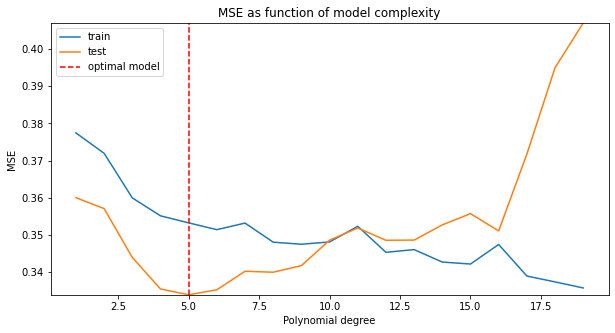

In [84]:
plot_train_test_error(df_error.index, df_error['MSE train'], df_error['MSE test'])
plot_train_test_error(df_error.index, df_error['R2 train'], df_error['R2 test'], plot_optimal=False)

![alt](figs_v3/ex2_mse_deg.png) | ![alt](figs_v3/ex2_r2_deg.png)

The two plots above show how the two error scores MSE and R2 varies with model complexity. Considering the R2 score, the error of the train set increases slowly towards an R2 score of 1, whereas the test set peaks at $-0.45$ for polynomial degree five. Throughout the project we shall focus on the MSE, because this error score has an easier physical interpretation and is compatible with a bias-variance tradeoff analysis.

Compared to Figure 2.11 in Hastie, the MSE for fitting the FrankeFunction varies less smoothly with model complexity. The training MSE decreases slightly, but steadily with increasing model complexity. For low order polynomials the test MSE decreases at a higher rate than the training MSE. This initial reduction examplifies an underfitted model. That is, low polynomial degrees corresponds to too low complexity compared to the target function. As a result, the fitted model is too generalized (or too biased), unable to reproduce the characteristics of FrankeFunction.

Eventually the model reaches an inflection point for polynomial degree 5. This is a suggested optimal model complexity as the net MSE (training + test) reaches a minimum at this polynomial degree. The test MSE increases slightly for polynomial degrees beyond five, up to degree sixteen. For polynomial degrees larger than this, the test MSE rises abruptly. This is the point where the fitted model gets "too" complex, resulting in overfitting. Considering the fact that the test MSE is somewhat around the same value for the first fifteen polynomial degrees indicates that the optimal model might as well be another polynomial degree in this range. Such a switch of optimal model could be triggered by a minor thing, for instance another random state in the train-test-split or a slightly altered noise.

The loss function $C(\textbf{X}, \beta)$ represents the net error from our prediction, and is interpreted as the expected squared deviation of the predicted output $\tilde{y}$ from the true target $y$. More specifically, the loss is the mean squared error and can be separated into three parts; a bias, a variance and an irreducible noise. To show this, we use the trick by adding and subtracting the expected prediction inside the squared term. The derivation is as follows:

$$ E[(y-\tilde{y})^2] = E[(y-E(\tilde{y})+E(\tilde{y})-\tilde{y})^2] $$

To follow, we use that $y = f + \epsilon$ and that the target function $f$ and the predicted output $\tilde{y}$ are not stochastic variables. Hence, their expectation values are simply the values themselves.

\begin{align}
     E[(y-\tilde{y})^2] &= E[((\tilde{y}-E(\tilde{y})) + (E(\tilde{y})-y))^2] \\
     &= E\big[(\tilde{y}-E(\tilde{y}))^2 + 2(\tilde{y}-E(\tilde{y}))(E(\tilde{y})-y) + (E(\tilde{y})-y)^2 \big] \\
     &= E\big[(\tilde{y}-E(\tilde{y}))^2\big] + 2E(\tilde{y}-E(\tilde{y}))E(E(\tilde{y})-y) + E\big[(y-E(\tilde{y}))^2\big] \\
     &= E\Big[\big(\tilde{y} - E(\tilde{y})\big)^2\Big] + E\Big[\big(y - E(\tilde{y})\big)^2\Big],
\end{align}

where we have used that
$$ E[\tilde{y}-E(\tilde{y})] = E(\tilde{y}) - E[E(\tilde{y})] = E(\tilde{y}) - E(\tilde{y}) = 0, $$
in accordance with the aforementioned statements.

The true data is given by $y = f + \epsilon$, so the second term becomes

\begin{align}
    E\big[\big(y - E(\tilde{y})\big)^2\big] &= E\big[\big(f + \epsilon - E(\tilde{y})\big)^2 \big] \\
    &= E\big[\big(f-E(\tilde{y})\big)^2 + 2\big(f-E(\tilde{y})\big)\epsilon + \epsilon^2 \big] \\
    &= E\big[\big(f-E(\tilde{y})\big)^2\big] + 2E\big(f-E(\tilde{y})\big)E(\epsilon) + E(\epsilon^2)
\end{align}

The second term vanishes, i.e. $E(\epsilon)=0$ as a result of $\epsilon$ being normally distributed with mean zero and standard deviation $\sigma$. Morover, the last term can be written as

$$ E(\epsilon^2) = \text{Var}(\epsilon) + [E(\epsilon)]^2 = \text{Var}(\epsilon) = \sigma^2 $$

To summarize, we can decompose the MSE as follows

$$ \underline{E\big[(y-\tilde{y})^2\big] = E\big[\big(f-E(\tilde{y})\big)^2\big] + E\big[\big(\tilde{y} - E(\tilde{y})\big)^2\big] + \sigma^2} $$

The first term,
\begin{equation}
    \frac{1}{n}\sum_i (f_i - E[\tilde{y}])^2,
\end{equation}
is the bias. It represents the systematical error of our fitted model, more specifically - the deviation of the expected output prediction $E[\tilde{y}]$ from the true model $f_i$ (replaced by target $y_i$, since we don't really know the true underlying model). So, if $E[\tilde{y}]$ is adequately far from $f_i$ it implies that the individual predictions $\tilde{y_i}$ are systematically missing its target, expressed as a bias. The bias is illustrated in the figure below. The red pluses indicates the individual predictions $\tilde{y}_i$.

![alt](figs/bias_fig2.jpg)

The second term,
\begin{equation}
    \frac{1}{n}\sum_i (\tilde{y_i} - E[\tilde{y}])^2,
\end{equation}
is the variance. This represents the $\textit{internal}$ deviation of our predicted model. That is, the net deviation of each predicted output $\tilde{y_i}$ from the expected output prediction $E[\tilde{y}]$. It reflects the distance of each point $\tilde{y_i}$ to the expectation $E[\tilde{y}]$. So, if the quantity is large it means the individual predictions $\tilde{y_i}$ are widely spread out from their mean $E[\tilde{y}]$. The variance is illustrated in the figure below.

![alt](figs/variance_fig2.jpg)

The last term, $\sigma^2$, is simply the irreducible error from the true model itself - it is fixed. Hence, it represents the part of the MSE that can't be tuned or improved by a machine learning algorithm. Consequently, the MSE will be lower bounded by $\sigma^2$, meaning that we are unable to reproduce the desired model $f_i$ perfectly.

#### Bootstrapping

In [27]:
def plot_bias_variance(mse_train, mse_test, bias, variance, from_deg, to_deg):
    plt.figure(figsize=[10, 5])
    degrees = range(from_deg, to_deg)
    plt.plot(degrees, mse_train, c='orange', label='mse train')
    plt.plot(degrees, mse_test, c='b', label='mse test')
    plt.plot(degrees, bias, c='g', label='bias test')
    plt.plot(degrees, variance, c='r', label='variance test')
    plt.xlabel('Polynomial degree')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [28]:
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def bootstrap(xy_train, xy_test, z_train, z_test, B, deg):
    """Perform bootstrapping on input data (x,y), then train an OLS model
    with the resampled set and use it to predict targets z.
    
    Args:
        x, y (1D array): input variables
        z (2D array): target function
        B (int): number of bootstraps
        deg (int): polynomial degree
        
    """        
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression(fit_intercept=False))
    z_tilde = np.zeros((z_train.shape[0], B))
    z_pred = np.zeros((z_test.shape[0], B))
    
    # Centering data
    xy_train, xy_test = centering(xy_train, xy_test)
    
    for i in range(B): # Amounts of bootstraps to perform
        xy_boot, z_boot = resample(xy_train, z_train)
    
        model.fit(xy_boot, z_boot)
        z_tilde[:,i] = model.predict(xy_train)
        z_pred[:,i] = model.predict(xy_test)
        
    mse_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
    mse_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_tilde)
    
    return mse_train, mse_test, bias_test, var_test

In [29]:
x, y, x_y, z_1d = xyz_1D(50)

In [30]:
from_deg = 1; to_deg = 17 # 17
errors_train = np.zeros(to_deg-from_deg)
errors_test = np.zeros_like(errors_train)
biases = np.zeros_like(errors_train)
variances = np.zeros_like(errors_train)

xy_train, xy_test, z_train, z_test = train_test_split(x_y, z_1d, test_size=0.2, random_state=2020)

for d in range(from_deg, to_deg):
    
    error_train, error_test, bias_test, var_test = bootstrap(xy_train, xy_test, z_train, z_test, 100, d)
    
    errors_train[d-from_deg] = error_train # subtract from_deg to start at index 0
    errors_test[d-from_deg] = error_test 
    biases[d-from_deg] = bias_test
    variances[d-from_deg] = var_test

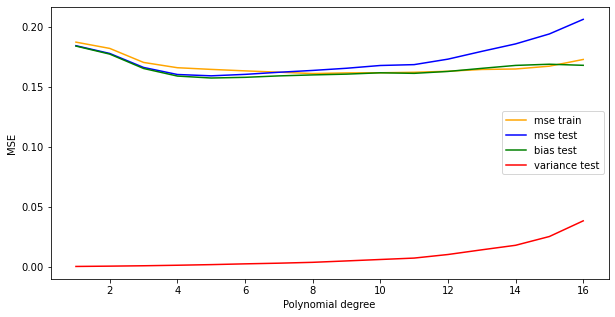

In [31]:
plot_bias_variance(errors_train, errors_test, biases, variances, from_deg, to_deg)

![alt](figs_v3/ex2_bias_var.png)

The plot above shows the decomposition of the MSE into bias and variance for the test data as well as the MSE for training data, using 50x50 samples and 100 bootstraps. The simulations show that the test MSE initially decreases, exclusively a result of decreased bias. The MSE reaches a minimum around polynomial degree five and starts increasing very slightly for larger degrees. The bias remains about constant for larger polynomial degrees - meaning that the problem of systematically missing some target values is not improved for higher model complexity. Variance, on the other hand, suddenly increases rapidly around polynomial degree 15 - as a result of the fitted model generating numerous spikes between the target points for the test data. This is the complexity level where the model starts overfitting, and indicates that we are moving from a bias-dominated region to a variance-dominated region. 

Not only does the variance increase for the largest polynomial degrees, the bias increases slightly as well. This is the opposite of what one should expect. Ideally, the bias should consistently decrease because the trained model becomes better and better at reproducing the characteristics of the target function. The problem arises when the model is to predict on unseen test data consisting of points outside the domain. When a highly complex model is to extrapolate to other points it is likely to induce large fluctuations that are not on wavelength with the relevant target points. Put simple, the prediction for extrapolation is likely more unstable for higher model complexity.

The explosive growth of the variance is better illustrated in Figure \ref{fig:apx2}, showing the same simulation up to polynomial degree 20.

### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.

### Answer

Cross-validation (CV) is another resampling technique to improve the fit of a model. In contrast to the individual shuffling done by bootstrap, CV splits the input data into $k$ folds, letting $k-1$ be training data and the remaining fold test data. This subset generation is performed $k$ times, creating $k$ different model fits that can be compared to provide a better model. Since we have the freedome to choose the size of the folds, it is a great tool for datasets with few samples.

We have already assessed different models by the bootstrap method. Comparing the results from bootstrap with the results from CV, we get an indication of the precision and reliability of the errors in our fitted model. Optimally, we want a minimal deviation between the different results.

A small sidenote is that the concept of using different folds in cross-validation seems to violate the fact that the test set should be untouched. Namely, for each split we use a *different* test set. However, the fitting in each fold is independent from one another, and by taking the average of the resulting MSEs we should principally get a more reliable estimate of MSE, because we avoid relying on a single MSE estimate that might result from an "unfortunate" train-test-split.

In [33]:
from sklearn.model_selection import cross_val_score, KFold

x, y, x_y, z_1d = xyz_1D(100)

def linreg_CV(x_y, z, k_fold, k=5, degree=5):
    mse_kfold = np.zeros(k)

    #linreg = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    linreg = LinearRegression(fit_intercept=False)
    
    i = 0
    for train_idx, test_idx in k_fold.split(x_y): # Split input data into bins of train and test
        x_train = x_y[train_idx] # Assign training data based on split
        z_train = z[train_idx]
        x_test = x_y[test_idx]
        z_test = z[test_idx]
      
        x_train, x_test = centering(x_train, x_test)
        X_train = create_X(x_train[:,0], x_train[:,1], degree)
        X_test = create_X(x_test[:,0], x_test[:,1], degree)

        linreg.fit(X_train, z_train)
        z_pred = linreg.predict(X_test)

        mse_kfold[i] = np.sum((z_pred - z_test)**2)/np.size(z_pred) # Retain MSE before starting on new fold
        i += 1

    estimated_mse_kfold = np.mean(mse_kfold)
    return estimated_mse_kfold

In [34]:
def CV_Franke(x_y, z, kfolds, maxdeg, plot_scikit=False):
    polydegs = np.arange(1, maxdeg)
    mse_kfold = np.zeros((len(kfolds), maxdeg-1))
    scikit_mse_kfold = np.zeros((len(kfolds), maxdeg-1))

    fig, ax = plt.subplots(1, len(kfolds), figsize=[20,4])
    
    for i, k in enumerate(kfolds):
        k_fold = KFold(n_splits = k)

        for deg in range(1, maxdeg):
            estimated_mse_kfold = linreg_CV(x_y, z, k_fold, k=k, degree=deg)
            mse_kfold[i, deg-1] = estimated_mse_kfold

            if plot_scikit:
                
                OLS = LinearRegression(fit_intercept=False)
                x_y_scaled = x_y - np.mean(x_y, axis=0) # Center data
                X = create_X(x_y_scaled[:,0], x_y_scaled[:,1], deg)

                estimated_mse = cross_val_score(OLS, X, z, scoring='neg_mean_squared_error', cv=k_fold)
                scikit_mse_kfold[i, deg-1] = np.mean(-estimated_mse)
                
        ax[i].plot(polydegs[:], mse_kfold[i, :], c='b', label='Own code')
        if plot_scikit:
            ax[i].plot(polydegs[:], scikit_mse_kfold[i, :], c='g', linestyle='--', label='Scikit')
        ax[i].set(xlabel='Polynomial degree', ylabel='MSE', title=f'Estimated test MSE using CV, k={k} folds')
        ax[i].legend()
    plt.show()
    
    return mse_kfold, scikit_mse_kfold

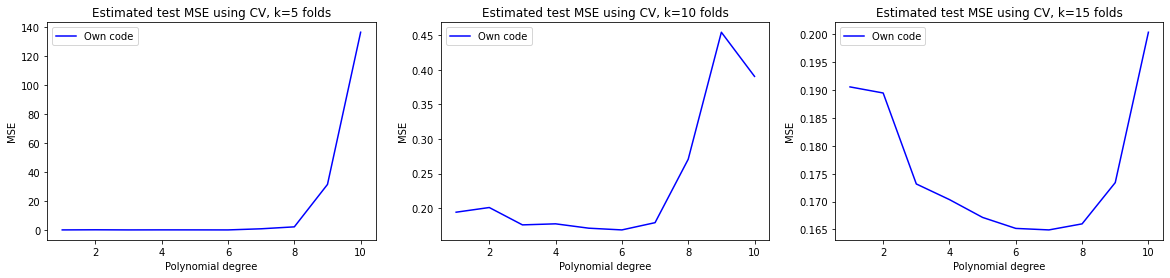

In [35]:
maxdeg = 11 # 18
kfolds = [5, 10, 15]
own_mse_cv, scikit_mse_cv = CV_Franke(x_y, z_1d, kfolds, maxdeg)

![alt](figs_v3/ex3_CV_deg18.png)

The three plots above show the expected MSE for test data using k-fold cross-validation for polynomials up to degree 18 for $k=5$, $k=10$ and $k=15$ folds, respectively. There is clearly a common trend among the three folds - the MSE explodes at a polynomial degree around 14. This indicates the complexity region where the fitted model really starts overfitting. By comparing the different folds, one notices that the values decreases drastically for larger folds, suggesting that using larger folds benefits the model fit. This is partly true, in the sense that eventually the folds become to big to produce reliable results. The reason is that we run the CV for a finite set of samples (100x100 data points), meaning that the test set will eventually be too small with too little correlation to the training set.

In addition, there are also differences among the three folds for lower polynomial degrees, but they are deafed by the exploding values. To compare the MSE for low order polynomials we need to restrict the number of degrees evaluated for. The result up to degree nine is shown in the three plots below.

![alt](figs_v3/ex3_CV_deg10.png)

For 5 folds CV, the explosive growth is already apparent at polynomial degree 8, and it's still difficult to analyse the behaviour for low order polynomials. For 10 folds, the simulations show a similar pattern for when the model starts overfitting. On the other hand, the MSE is not rising as abruptly as for 5 folds. Now we are able to partly examine the dependency on low polynomial degrees. The MSE initially decreases until reaching a minimum at around degree six. Moving over to 15 folds the trend is even clearer - the MSEs dependency on model complexity is convex in shape, with a global minimum for polynomial degree of about 7. The associated value is approximately $0.165$.

Usually the best results for CV are obtained for somewhere between 5 and 10 number of folds. In this case, the results for 15 folds correspond best to what is expected when increasing model complexity. But as mentioned we have 10 000 data points, meaning that the test set consist of $10^4/15 = 666$ samples. I believe this is an adequate number of samples to test the model on. Thus, we rely on the results obtained by 15 folds. But increasing the number of folds even further, one should consider the validity of the results.

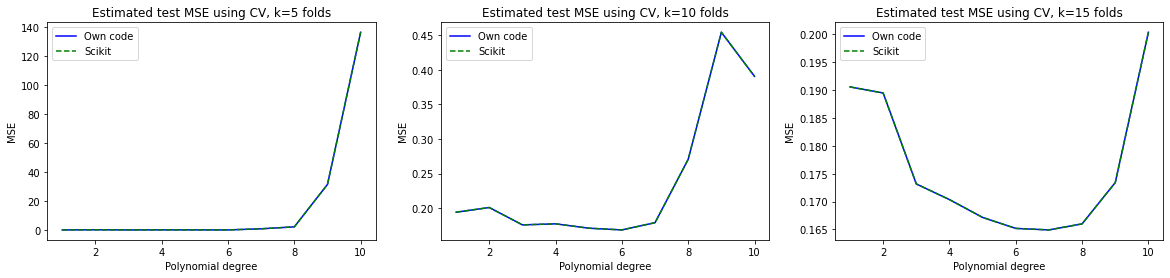

In [36]:
own_mse_cv, scikit_mse_cv = CV_Franke(x_y, z_1d, kfolds, maxdeg, plot_scikit=True)

In [46]:
print(own_mse_cv)

"""INSERT TABLE"""

[[  0.20398038   0.2831108    0.19996106   0.23062193   0.21914671
    0.19815655   0.97703167   2.3137062   31.60537932 136.66304295]
 [  0.19428833   0.20104298   0.17598241   0.17749078   0.17120007
    0.16870838   0.17917529   0.2707546    0.45409939   0.3903609 ]
 [  0.1905427    0.18945237   0.17315707   0.17035362   0.16716015
    0.16519569   0.16492529   0.16600906   0.17340016   0.20033444]]


'INSERT TABLE'

![alt](figs_v3/ex3_CV_own_scikit.png)

The plots above show the same experiment but using scikit's functionality for cross-validation. Compared to my own implementation of cross-validation it is a perfect fit. The two approaches have also been tested for polynomials up to degree 20, still providing a perfect fit. Hence, the comparison serves as a verification that my own implementation of CV is correct.

**Comparison to bootstrap**

Cross-validation shows of OLS shows similarities but also remarkable differences to bootstrap simulation of OLS. Perhaps the most striking difference is the value of the MSE when the model starts overfitting on the data. Both methods estimate a drastic increase of MSE for high order polynomials, particularly at degree 15. But where the MSE remains at comprehensible values up to degree 20 for bootstrap, it explodes for cross-validation. This suggests that the simulations are sensitive to *how* the data is resampled, for instance whether the data is sampled with replacement or not - an essential difference between CV and bootstrap. In this particular case, splitting into deterministic folds (by CV) seems to produce more unstable results.

However, an important similarity is the dependency of the MSE on model complexity. Both methods propose an approximately similar minimum test MSE ($0.159$ and $0.165$ for bootstrap and CV, respectively) for polynomials orders in the range five to seven. This verifies that the basis of the estimations are very similar. As a consequence, we can make an estimation of the optimal model complexity with a higher confidence.

### Exercise 4: Ridge Regression on the Franke function  with resampling (score 20 points)

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. Perform the same bootstrap analysis as in the
Exercise 2  (for the same polynomials) and the cross-validation  in exercise 3 but now for different values of $\lambda$. Compare and
analyze your results with those obtained in exercises 1-3. Study the
dependence on $\lambda$.

Study also the bias-variance trade-off as function of various values of
the parameter $\lambda$. For the bias-variance trade-off, use the **bootstrap** resampling method. Comment your results. 

#### Run bootstrap simulation for each poly-degree, storing the best (minimum) $\lambda$ for each degree.
#### After all runs, choose the model (poly-degree) with the lowest $\lambda$ found.
#### Compare corresponding minimum MSE with min MSE obtained from OLS with bootstrap/CV

### Answer

In the previous exercises we have seen that the minimum test MSE obtained is far from optimal - a mutual agreement between the methods used. Thus, one should raise the question; is it possible to further reduce the error? The noisy FrankeFunction is quite spiky, resulting in a highly fluctuating fitted model. This generates large variations in predicted target values, accompanied by parameters $\beta$ large in magnitude. However, the underlying function is smoother. So, to improve the fit one should dampen the values of $\beta$. Mathematically, it means restraining $\beta$ by adding a term in the minimization function; the L2-norm of $\beta$. This is what ridge regression does. In the following, we run bootstrap simulations of ridge regression, and compare the estimated MSE with that obtained with OLS, to see if we can make an even better fit to FrankeFunction.

#### Bootstrap

In [47]:
def ridge(X, Xpred, y, lmb):
    inv = np.linalg.pinv(X.T @ X + np.eye(len(X.T))*lmb)
    beta = inv @ X.T @ y # Use pinv to resolve problem inverting singular matrices
    ypred = Xpred @ beta
    return ypred, beta

In [48]:
def run_ridge(x_y, z, nr_deg, lmb):
    X = create_X(x_y[:,0], x_y[:,1], nr_deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020)
    
    X_train, X_test = centering(X_train, X_test)
    
    z_tilde, beta = ridge(X_train, X_train, z_train, lmb)
    z_pred, _ = ridge(X_train, X_test, z_train, lmb)
    
    return z_tilde, z_pred, beta

Because of the additional regularization term in the minimization function, the error in the model fit is no longer independent of the intercept $\beta_0$, as it was for OLS. Excluding the intercept would hence lead to an overoptimistic mean squared error. Therefore, it is vital to set ```fit_intercept=False``` to prevent Ridge from removing the intercept from our design matrix. Just as for OLS we scale our data by subtracting the mean value of the design matrix. The same concept of scaling applies for Ridge. That is, for our particular vanilla data the features are only defined in the range $[0\:1]$, implying that the data can already be considered scaled. We scale the data though, just to be consistent. Implementing scaling in our methods is essential for when we move over to real-world data where the features are not normalized.

In [49]:
def ridge_scikit(x_y, z, nr_deg, lmb):
    X = create_X(x_y[:,0], x_y[:,1], nr_deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020)
    X_train, X_test = centering(X_train, X_test)
    
    model = Ridge(lmb, fit_intercept=False)
    model.fit(X_train, z_train)
    beta = model.coef_
    z_tilde = model.predict(X_train)
    z_pred = model.predict(X_test)
    
    return z_tilde, z_pred, beta

In [50]:
def test_ridge_implementation():
    x, y, x_y, z_1d = xyz_1D(50)
    z_tilde1, z_pred1, beta1 = run_ridge(x_y, z_1d, 5, 0.1)
    z_tilde2, z_pred2, beta2 = ridge_scikit(x_y, z_1d, 5, 0.1)
    
    assert np.allclose(z_tilde1, z_tilde2), f'{z_tilde1} /= {z_tilde2}'
    assert np.allclose(z_pred1, z_pred2), f'{z_pred1} /= {z_pred2}'
    assert np.allclose(beta1, beta2), f'{beta1} /= {beta2}'
    
test_ridge_implementation()

In [51]:
x, y, x_y, z_1d = xyz_1D(50)

In the following bootstrap simulation we perform the train-test split on the design matrix $X$. Because we make a new design matrix for each simulation with a new polynomial degree, we also do a new train-test split each simulation. Ideally, we want to analyse the results using the same untouched test set. Therefore, we set a particular ```random_state``` in the ```train_test_split``` function to ensure we assign the same data points to the test set every new simulation.

In [52]:
# Ridge Bootstrap
lambdas = np.logspace(-4, 4, 9)
min_deg = 1
max_deg = 20 #16
degrees = np.arange(min_deg, max_deg+1)
mse_train_ridge = np.zeros((len(lambdas), len(degrees)))
mse_test_ridge = np.zeros_like(mse_train_ridge)
biases_ridge = np.zeros_like(mse_train_ridge)
variances_ridge = np.zeros_like(mse_train_ridge)

B = 100 # nr bootstraps

def ridge_bootstrap(x_y, z, B, deg):
    # Intermediate storage of errors (for given degree)
    mse_train_deg = np.zeros(len(lambdas))
    mse_test_deg = np.zeros_like(mse_train_deg)
    biases_deg = np.zeros_like(mse_test_deg)
    variances_deg = np.zeros_like(mse_test_deg)

    for i, lmb in enumerate(lambdas):
        X = create_X(x_y[:,0], x_y[:,1], deg)
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020) # 2124

        X_train, X_test = centering(X_train, X_test) # Scale before starting resampling

        z_tilde = np.zeros((z_train.shape[0], B))
        z_pred = np.zeros((z_test.shape[0], B))

        for b in range(B):
            X_boot, z_boot = resample(X_train, z_train)

            z_tilde[:, b], beta = ridge(X_boot, X_train, z_boot, lmb) # Train on bootstrapped sample, predict on original training data
            z_pred[:, b], _ = ridge(X_boot, X_test, z_boot, lmb) # Train on bootstrapped sample, predict on test data

        error_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_tilde)
        error_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
        
        mse_train_deg[i] = error_train
        mse_test_deg[i] = error_test
        biases_deg[i] = bias_test
        variances_deg[i] = var_test
        
    return mse_train_deg, mse_test_deg, biases_deg, variances_deg

In [53]:
for deg in degrees:
    mse_train_deg, mse_test_deg, bias_deg, var_deg = ridge_bootstrap(x_y, z_1d, B, deg)
    
    mse_train_ridge[:, deg-min_deg] = mse_train_deg
    mse_test_ridge[:, deg-min_deg] = mse_test_deg
    biases_ridge[:, deg-min_deg] = bias_deg
    variances_ridge[:, deg-min_deg] = var_deg

In [54]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
data = np.vstack([np.hstack(mse_train_ridge.T), np.hstack(mse_test_ridge.T), \
                  np.hstack(biases_ridge.T), np.hstack(variances_ridge.T)])
df_ridge_boot = pd.DataFrame(data, index=['MSE train', 'MSE test', 'Bias test', 'Variance test'], columns=idx)

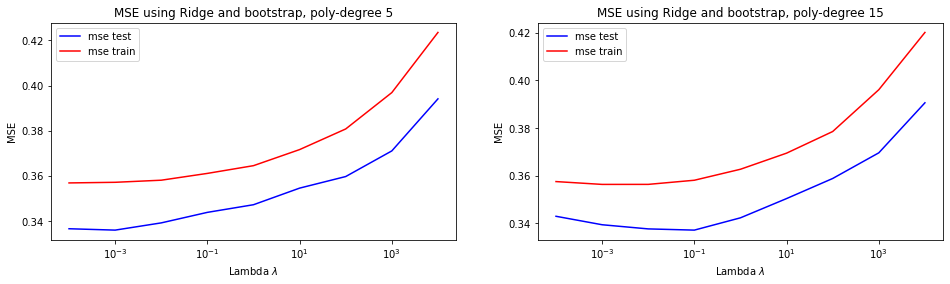

In [55]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_ridge_boot.loc['MSE test'][deg], c='b', label='mse test')
    ax[i].semilogx(lambdas, df_ridge_boot.loc['MSE train'][deg], c='r', label='mse train')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Ridge and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

In [56]:
df_ridge_boot

Degree                1                                               \
Lambda        0.0001     0.0010     0.0100     0.1000     1.0000       
MSE train       0.377819   0.377856   0.377837   0.377782   0.377810   
MSE test        0.360371   0.360434   0.360423   0.360351   0.360360   
Bias test       0.359989   0.360014   0.360025   0.360011   0.359987   
Variance test   0.000382   0.000420   0.000398   0.000340   0.000373   

Degree                                                               2   ...  \
Lambda        10.0000    100.0000   1000.0000     10000.0000 0.0001      ...   
MSE train       0.377965   0.385282   0.417726  4.304861e-01   0.372913  ...   
MSE test        0.359811   0.363407   0.389398  4.003842e-01   0.357937  ...   
Bias test       0.359503   0.363251   0.389390  4.003841e-01   0.356984  ...   
Variance test   0.000308   0.000156   0.000008  1.057957e-07   0.000953  ...   

Degree                19         20                                   \
Lambda        10000.0000 0.0001     0.0010     0.0100     0.1000       
MSE train       0.419881   0.358178   0.357340   0.357524   0.358109   
MSE test        0.390297   0.345891   0.341569   0.338103   0.337819   
Bias test       0.390287   0.337782   0.334786   0.333432   0.334544   
Variance test   0.000011   0.008109   0.006782   0.004671   0.003275   

Degree                                                                
Lambda        1.0000     10.0000    100.0000   1000.0000  10000.0000  
MSE train       0.362386   0.369233   0.378592   0.396202   0.419630  
MSE test        0.341574   0.349448   0.359145   0.369773   0.390034  
Bias test       0.339255   0.348261   0.358454   0.369542   0.390026  
Variance test   0.002319   0.001186   0.000691   0.000230   0.000008  

[4 rows x 180 columns]

The left and right plots show the dependence of MSE on regularization parameter $\lambda$, for polynomial degree five and fifteen, respectively. For polynomial degree five, the estimated MSE for the test set has a slight initial decrease, reaching a minimum of $0.365$ for $\lambda = 1$. For larger $\lambda$, MSE increases and the model fit is worse. A fitted model of polynomial degree fifteen shows much of the same behaviour, only that the minimum MSE is now obtained for $\lambda = 10$ with a value of about $0.37$. The difference in optimal $\lambda$ for the two polynomial degrees implies that optimizing a model of higher complexity requires a stronger penalization of the parameters $\beta$. Intuitively it makes sense, because a model of higher polynomial degree possesses larger fluctuations that are more likely to interpolate and extrapolate way beyond the data points of the target function. Hence, the parameters need to be shrunk to better capture tha main characteristics of the target function - that is reducing their variance. However, too large penalty will only worsen the MSE, as shown in the right part of the plot, because the model fit becomes *too* general and is not a good representation of the FrankeFunction anymore.

In [57]:
min_mse_lmb_idx = [df_ridge_boot.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_ridge_boot.loc['MSE test'][i].min() for i in degrees]
min_mse_boot = np.vstack([min_mse_lmb, min_mse]).T
min_mse_boot

array([[1.00000000e+01, 3.59810981e-01],
       [1.00000000e+01, 3.56979527e-01],
       [1.00000000e-04, 3.45312812e-01],
       [1.00000000e-04, 3.38226881e-01],
       [1.00000000e-03, 3.35928950e-01],
       [1.00000000e-03, 3.35794149e-01],
       [1.00000000e-02, 3.36432165e-01],
       [1.00000000e-02, 3.36036528e-01],
       [1.00000000e-02, 3.36126443e-01],
       [1.00000000e-02, 3.36859396e-01],
       [1.00000000e-02, 3.36495575e-01],
       [1.00000000e-02, 3.36283749e-01],
       [1.00000000e-02, 3.36780691e-01],
       [1.00000000e-02, 3.36894797e-01],
       [1.00000000e-01, 3.37221051e-01],
       [1.00000000e-02, 3.37431998e-01],
       [1.00000000e-01, 3.37639519e-01],
       [1.00000000e-01, 3.37369597e-01],
       [1.00000000e-01, 3.38134291e-01],
       [1.00000000e-01, 3.37818740e-01]])

Let's extrapolate the results to the entire set of polynomials. The table below shows the minimum test MSE achieved with Ridge bootstrap, with corresponding $\lambda$, for different polynomial degrees.

| Degree  | Lambda ($\lambda$)	| MSE test |
|---|-----------|----------|
| 1 | 10   | 1.282    |
| 2 | 1	| 1.268  | 
| 3	| 0.0001	| 1.176  | 
| 4	| 0.001	| 1.104  |
| 5	| 0.01	| 1.107  | 
| 6	| 0.0001	| 1.110  |
| 7	| 0.0001	| 1.106  |
| 8	| 0.001	| 1.105  | 
| 9	| 0.001	| 1.104  | 
| 10| 0.001	| 1.101  |
| 11| 0.01	| 1.100  |
| 12| 0.01   | 1.100  |
| 13| 0.01     | 1.099  |
| 14| 0.01     | 1.099  |
| 15| 0.1     | 1.102  |
| 16| 0.1     | 1.103  |

The MSEs in the table illustrate a convex dependency on polynomial degree, just as for OLS. It decreases the first three polynomial degrees, where it reaches a minimum, and then starts increasing slightly. The model complexity with lowest MSE obtains their minimums for $\lambda={0.1,\:1}$. For larger polynomial degrees, the best models seem to consistently be achieved for $\lambda = 10$, a slightly larger penalty (as explained in the above paragraph).

Compared to bootstrap for OLS, there are two observations to mention. First is that minimum MSEs varies less across model complexity. This might the result of the regularization parameter that performs a greater shrinkage on the higher polynomial degrees, effectively making complex model fits more similar to the less complex ones. The second observation is the actual values of the MSEs. The minimum MSE estimated by Ridge is $0.363$, compared to $0.159$ for OLS, obtained for slightly different model complexities - degree 3 and degree 5, respectively. Conclusively, Ridge does not lead to any performance improvements when fitting the FrankeFunction, at least not by the bootstrap method.

#### Cross-validation

In [58]:
x, y, x_y, z_1d = xyz_1D(100)

In [59]:
lambdas = np.logspace(-4, 4, 9)

def CV_Ridge(x_y, z, k, deg):
    mse_lambdas = np.zeros(len(lambdas))
    
    k_fold = KFold(n_splits = k)
    x_y_scaled = x_y - np.mean(x_y, axis=0) # Centering

    for i, lmb in enumerate(lambdas):
        ridge = Ridge(alpha=lmb, fit_intercept=False) # Don't fit intercept, since we are including intercept in design matrix
        X = create_X(x_y_scaled[:,0], x_y_scaled[:,1], deg)

        estimated_mse = cross_val_score(ridge, X, z, scoring='neg_mean_squared_error', cv=k_fold)
        mse_lambdas[i] = np.mean(-estimated_mse)
    
    return mse_lambdas

In [60]:
min_deg = 1
max_deg = 20
degrees = np.arange(min_deg, max_deg+1)
mse_degrees = np.zeros((len(lambdas), len(degrees)))
k = 5

for deg in degrees:
    mse_lambdas = CV_Ridge(x_y, z_1d, k=k, deg=deg)
    mse_degrees[:,deg-min_deg] = mse_lambdas

In [61]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
data = np.hstack(mse_degrees).reshape(1,-1) # Reshape to only give one row
df_ridge_cv = pd.DataFrame(data, index=['MSE test'], columns=idx)

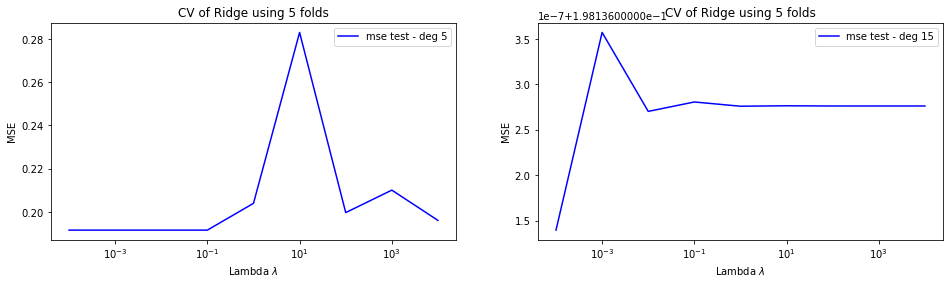

In [62]:
fig, ax = plt.subplots(1,2,figsize=[16, 4])
mse_ridge_cv = lambda deg: np.ravel(df_ridge_cv[deg].values)
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, mse_ridge_cv(deg), c='b', label=f'mse test - deg {deg}')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'CV of Ridge using {k} folds')
    ax[i].legend()
plt.show()

Using cross-validation, the dependency on $\lambda$ is a bit more complicated than for bootstrapping. The plots for $k=5$, for polynomial degree five and fifteen, show quite different dependency on $\lambda$. In both cases, lowest MSE is obtained for low $\lambda$. Still, the large fluctuations make it difficult to come up with an accurate conclusion of the best model, particularly for polynomial degree five - as it looks like the MSE is approaching a minimum for very large $\lambda$. Notice also how much larger the MSE is for polynomial degree fiftheen, apparently saturating around $0.275*0.2=0.55$ for large values of $\lambda$. The latter might indicate that the parameters $\beta$ have been shrunk down to approximately zero so that the MSE can't get any worse (nor better).

The plots for $k=10$ show much of the same characteristics, but with the difference that the estimated minimum MSE for polynomial degree five is consistently lower and for polynomial degree fifteen consistently higher than for 5 fold CV. The minimum MSE for degree five is similar to that of degree five from cross-validation with OLS. For degree fifteen though, the minimum MSE with Ridge is about $1.4$ (after convertion from the weird axis) and is many orders less than that obtained by cross-validation OLS (recall the explosive growth beyond degree fifteen). This illustrates that Ridge improves the performance for models of high complexity, by effectively reducing the extent of the fluctuating parameters $\beta$.

Simulations with 15 folds is provided in Figure \ref{} in Appendix. It shows the same dependency on $\lambda$ as for 5 and 10 folds, but with a further reduction of MSE - the model fitted with polynomial degree five reaches a minimum MSE of $0.165$. This is lower than obtained by OLS for the same degree. Conclusively, Ridge provides an improvement to our fit if we use 15 folds. Though, considering that the corresponding $\lambda$ is very low, the algorithm is pretty similar to OLS.

In [63]:
min_mse_lmb_idx = [df_ridge_cv.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_ridge_cv.loc['MSE test'][i].min() for i in degrees]
min_mse_cv = np.vstack([min_mse_lmb, min_mse]).T

In [64]:
min_mse_cv

array([[1.00000000e+04, 1.87338159e-01],
       [1.00000000e+04, 1.87266504e-01],
       [1.00000000e-04, 1.87266504e-01],
       [1.00000000e+04, 1.91585958e-01],
       [1.00000000e-01, 1.91585955e-01],
       [1.00000000e-03, 1.96487868e-01],
       [1.00000000e+01, 1.96509502e-01],
       [1.00000000e+04, 1.92287900e-01],
       [1.00000000e+03, 1.92287872e-01],
       [1.00000000e-03, 2.13548645e-01],
       [1.00000000e+03, 2.14140577e-01],
       [1.00000000e-03, 2.03027668e-01],
       [1.00000000e-04, 2.23868549e-01],
       [1.00000000e+01, 1.98075495e-01],
       [1.00000000e-04, 1.98136139e-01],
       [1.00000000e-03, 1.98136276e-01],
       [1.00000000e-04, 2.23768811e-01],
       [1.00000000e-04, 2.23769625e-01],
       [1.00000000e+00, 3.03317970e-01],
       [1.00000000e-03, 3.03317972e-01]])

| Degree| $\lambda$ (5-fold)| MSE (5-fold) | $\lambda$ (10-fold) | MSE (10-fold) |  $\lambda$ (15-fold) | MSE (15-fold)|           
|---|-----------|----------| --------- | --------- | ------- | ------- |
| 1 | 10000   | 0.187    | 100   | 0.166    | 10000 | 0.164 |
| 2 | 10000	| 0.187  | 0.001   | 0.166    | 10 | 0.164 |
| 3	| 0.0001	| 0.187  | 0.0001   | 0.166    | 0.0001 | 0.164 |
| 4	| 10000	| 0.192  |0.001   | 0.168    | 0.1 | 0.165 |
| 5	| 0.1	| 0.192  | 0.0001   | 0.168    | 0.0001 | 0.165 |
| 6	| 0.001	| 0.196  |1000   | 0.170    | 10000 | 0.167 |
| 7	| 10	| 0.197  |0.0001   | 0.170    | 1 | 0.167 |
| 8	| 10000	| 0.192  | 0.1   | 0.171    | 1000 | 0.169 |
| 9	| 1000	| 0.192  | 0.0001   | 0.171    | 0.0001 | 0.169 |
| 10| 0.001	| 0.214  |10000   | 0.174    | 10000 | 0.172 |
| 11| 1000	| 0.214  |1000   | 0.174    | 10000 | 0.172 |
| 12| 0.001   | 0.203  |0.0001   | 0.174    | 0.0001 | 0.172 |
| 13| 0.0001     | 0.224  |0.0001   | 0.188    | 10000 | 0.181 |
| 14| 10     | 0.198  |0.001   | 0.188    | 0.001 | 0.181 |
| 15| 0.0001    | 0.198  |10000   | 0.191    | 10000 | 0.187 |
| 16| 0.001     |  0.198 |0.1   | 0.191    | 0.1 | 0.187 |
| 17| 0.0001 | 0.224 |1000   | 0.212    | 10000 | 0.209 |
| 18| 0.0001 | 0.224 |0.0001   | 0.212    | 1 | 0.209 |
| 19| 1 | 0.303 |10000   | 0.290   | 10000 | 0.286 |
| 20| 0.001 | 0.303 |0.001  | 0.290    | 10 | 0.286 |

The results of MSE for all polynomial degrees using Ridge CV, with $k=5$, $k=10$ and $k=15$ folds, are shown in the table above, respectively. For 5 folds, the minimum estimated test MSE shows a gradual increase for higher polynomial orders (except a minor decrease after the first polynomial order, with a global minimum MSE of $0.187$ achieved for polynomial degrees two and three - accounting for decimal precision). Compared to 5-fold CV of OLS, the results are different. OLS obtains a global minimum MSE of $0.198$ for polynomial degree six. Thus, Ridge gives a slight improvement of estimated minimum MSE. An important notice though, is that the proposed $\lambda$ for the minimum MSE for polynomial degree two and three are completely different ($10^{-4}$ and $10^4$ respectively). Now, neither polynomial degree two or three contains large fluctuations, so it's hard to explain why the strength of the penalty is vastly different. 

For 10 folds, the minimum estimated MSE shows a similar kind of dependency on model complexity as 5 folds, that is slightly increasing with for increasing model complexity. The global minimum is now achieved for first order polynomial fit, with a value of $0.166$ (but only a forth decimal makes it different from second and third order) with a corresponding $\lambda=100$. Hence, expanding to 10 folds suggests a slightly better estimate of the error. The minimum MSE is again slightly better than 10-fold CV for OLS (with a minimum of $0.168$, obtained for degree six). So the only difference is the suggested optimal model complexity.

Finally, for 15 folds the minimum MSE is $0.164$, obtained for polynomial fits of order two and three (accounting for round-off errors). This is, yet again, very similar to the minimum MSE from cross-validation for 15 folds with OLS (a value of $0.165$). Overall, cross-validation with Ridge provides a negligable improvement of the fitted model. 

The optimal $\lambda$ is very different for different polynomial degrees, with no sign of any correlation. This is a mutual result among all folds. Even polynomial models of only one degree difference may have a completely different optimal $\lambda$. This makes it difficult to make an in depth analysis of the MSEs dependency on $\lambda$.

#### Bias-variance analysis with bootstrap

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_ridge_boot[deg].loc['MSE test'], c='b', label='mse')
    ax[i].semilogx(lambdas, biases_ridge[:, deg], c='g', label='bias')
    ax[i].semilogx(lambdas, variances_ridge[:, deg], c='r', label='variance')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Ridge and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

In [ ]:
plt.figure(figsize=[12,4])

plt.semilogx(lambdas, variances_ridge[:, plot_deg[0]], c='b', label=f'degree {plot_deg[0]}')
plt.semilogx(lambdas, variances_ridge[:, plot_deg[1]], c='r', label=f'degree {plot_deg[1]}')
plt.xlabel('Lambda $\lambda$')
plt.ylabel('Variance')
plt.title('Variance term of MSE')
plt.legend()
plt.show()

The MSE consist almost entirely of bias. The bias increases with increasing $\lambda$, as a result of larger shrinkage of parameters $\beta$. In turn, this imposes a smoother and more generalized model fit that will systematically miss more targets (particularly the outliers). The variance though, remains around zero for all polynomial degrees. This differs from the simulation of OLS, where the error increases rapidly at a particular high polynomial degree.

Apart from the bias, analysing the bias-variance tradeoff in a single plot is difficult, so we've included an individual plot of the variance. Notice how the variance decreases monotonically with increasing $\lambda$, both for fifth and fiftheenth order polynomials. This is a direct result of the effect of $\lambda$; larger $\lambda$ is associated with a greater dampening of the fluctuations of the fitted model. It approaches zero when $\lambda$ gets several orders of magnitude large. OLS has the opposite development of variance for model complexity, namely because the parameters $\beta$ are allowed to fluctuate inhibited. The plot shows one important difference, though. The variance is about twice as large for a polynomial fit of order fifteen compared to order five. This is essentially just the fact that a larger degree polynomial is characterized by larger fluctuations than a lower degree polynomial. 

### Exercise 5: Lasso Regression on the Franke function  with resampling (Score 10 points))

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.  Perform here as well an analysis of the bias-variance trade-off using the **bootstrap** resampling technique and an analysis of the mean squared error using cross-validation. 

### Answer

In [ ]:
x, y, x_y, z_1d = xyz_1D(50)

In [ ]:
# Lasso Bootstrap
lambdas = np.logspace(-4, 4, 9)
min_deg = 1
max_deg = 20 #16
degrees = np.arange(min_deg, max_deg+1)
mse_train_lasso = np.zeros((len(lambdas), len(degrees)))
mse_test_lasso = np.zeros_like(mse_train_lasso)
biases_lasso = np.zeros_like(mse_train_lasso)
variances_lasso = np.zeros_like(mse_train_lasso)

B = 100 # nr bootstraps

def lasso_bootstrap(x_y, z, B, deg, plot_fit=False):
    """Algorithm running bootstraps of Lasso regression.
    
    Args:
        x_y (array): 2D stacked array of x and y features
        z (array): target function
        B (int): nr of bootstraps
        deg (int): polynomial degree to run bootstraps for
        plot_fit (bool): plot sample fits
        
    Returns:
        mse_train_deg: array of train MSEs for different lambdas
        mse_test_deg: array of test MSEs for different lambdas
        biases_deg: array of biases for test data
        variances_deg: array of variances for test data
        
    """
    # Intermediate storage of errors (for given degree)
    mse_train_deg = np.zeros(len(lambdas))
    mse_test_deg = np.zeros_like(mse_train_deg)
    biases_deg = np.zeros_like(mse_test_deg)
    variances_deg = np.zeros_like(mse_test_deg)

    for i, lmb in enumerate(lambdas):
        X = create_X(x_y[:,0], x_y[:,1], deg)
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=2124)

        X_train, X_test = centering(X_train, X_test) # Scale before starting resampling

        z_tilde = np.zeros((z_train.shape[0], B))
        z_pred = np.zeros((z_test.shape[0], B))

        for b in range(B):
            X_boot, z_boot = resample(X_train, z_train) # Bootstrap
            
            lasso_model = Lasso(lmb, fit_intercept=False)
            lasso_model.fit(X_boot, z_boot)
            betas = lasso_model.coef_

            z_tilde[:, b] = lasso_model.predict(X_train) # Train on bootstrapped sample, predict on original training data
            z_pred[:, b] = lasso_model.predict(X_test) # Train on bootstrapped sample, predict on test data
            
            if plot_fit:
                if b==0: # Make only one plot per lambda
                    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[6,6])
                    z_franke = FrankeFunction(x, y, add_noise=False)
                    plot_Franke(fig, ax, x, y, z_franke, alpha=0.4)
                    X_plot, _ = centering(X, X)
                    z_plot = lasso_model.predict(X_plot)
                    z_plot = z_plot.reshape(len(x), len(y)) + np.mean(z)
                    surf_plot = ax.plot_surface(x, y, z_plot, cmap='viridis', alpha=0.7,
                           linewidth=0, antialiased=False)
                    fig.colorbar(surf_plot, shrink=0.5, aspect=10)
                    #plot_prediction(fig, ax, x_y, betas, deg, clr=cm.cool)
                    plt.title(f'deg={deg}, $\lambda$={lmb}')
                    plt.show()
            
                
        error_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_tilde)
        error_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
        
        mse_train_deg[i] = error_train
        mse_test_deg[i] = error_test
        biases_deg[i] = bias_test
        variances_deg[i] = var_test
        
    return mse_train_deg, mse_test_deg, biases_deg, variances_deg

In [ ]:
for deg in degrees:
    mse_train_deg, mse_test_deg, bias_deg, var_deg = lasso_bootstrap(x_y, z_1d, B, deg, plot_fit=True)
    
    mse_train_lasso[:, deg-min_deg] = mse_train_deg
    mse_test_lasso[:, deg-min_deg] = mse_test_deg
    biases_lasso[:, deg-min_deg] = bias_deg
    variances_lasso[:, deg-min_deg] = var_deg

In [ ]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
data = np.vstack([np.hstack(mse_train_lasso.T), np.hstack(mse_test_lasso.T), \
                  np.hstack(biases_lasso.T), np.hstack(variances_lasso.T)])
df_lasso_boot = pd.DataFrame(data, index=['MSE train', 'MSE test', 'Bias test', 'Variance test'], columns=idx)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_lasso_boot.loc['MSE train'][deg], c='r', label='mse train')
    ax[i].semilogx(lambdas, df_lasso_boot.loc['MSE test'][deg], c='b', label='mse test')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Lasso and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

In the case of Lasso, the plots above clearly illustrates that penalizing parameters $\beta$ does not impose any improvement on the MSE. The MSE has its minimum for a weak regularization ($\lambda = 10^{-3}$). Such a low $\lambda$ is essentially just an approximation to ordinary least squares. The dependency of MSE on $\lambda$ for polynomial degree five and fifteen are indistinguishable. Notice that the MSE reaches saturation at around $0.415$ for $\lambda = 0.1$. The explanation is that all parameters $\beta$ have effectively been sent to zero - a result shared for all polynomial features. At this point the MSE can't become any worse, and the error reaches a maximum.

In [ ]:
min_mse_lmb_idx = [df_lasso_boot.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_lasso_boot.loc['MSE test'][i].min() for i in degrees]
min_mse_boot = np.vstack([min_mse_lmb, min_mse]).T

| Degree  | Lambda ($\lambda$)	| MSE test |
|---|-----------|----------|
| 1 | 0.001   | 0.372    |
| 2 | 0.001	| 0.369  | 
| 3	| 0.0001	| 0.364  | 
| 4	| 0.0001	| 0.366  |
| 5	| 0.001	| 0.366  | 
| 6	| 0.001	| 0.365  |
| 7	| 0.001	| 0.366  |
| 8	| 0.001	| 0.366  | 
| 9	| 0.001	| 0.366  | 
| 10| 0.001	| 0.366  |
| 11| 0.0001	| 0.366  |
| 12| 0.0001   | 0.366  |
| 13| 0.0001     | 0.367  |
| 14| 0.0001     | 0.367  |
| 15| 0.0001     | 0.366  |
| 16| 0.0001     | 0.366  |

In the table above, we see the minimum MSEs obtained for different polynomials and corresponding $\lambda$, using Lasso bootstrapping. As already indicated, the minimum MSE hardly changes with model complexity. The biggest change occurs for the first three polynomial orders. Global minimum MSE is $0.364$ obtained for polynomial degree three. All these features are consistent with the bootstrap simulation of Ridge. What separates Lasso from Ridge is the associated regularization parameter $\lambda$, which is significantly lower for Lasso. This could imply that the Lasso model is sensitive for the parameter $\lambda$ in the sense that "too" many parameters are sent to zero even for a quite low $\lambda$. Consequently, best results are obtained with hardly any regularization, implying that hardly any parameters $\beta$ are sent to zero. To get more insight on how good the model is as a function of $\lambda$, we can plot the prediction done by Lasso for a selection of polynomial degrees and $\lambda$.

![alt](figs/ex5_fitFranke_deg15_lmb0-0001.png) | ![alt](figs/ex5_fitFranke_deg15_lmb0-01.png) |![alt](figs/ex5_fitFranke_deg15_lmb100.png)

The three upper plots above are examples of a fitted sixth order polynomial model vs. true FrankeFunction using Lasso bootstrapping, for three different values of $\lambda$. The fitted model using $\lambda = 10^{-4}$ shows some fluctuations that seems to be a good representation of the true function (FrankeFunction). Moving on to $\lambda=0.001$ the fitted model is a little less fluctuating, and a slightly worse representation of FrankeFunction. For $\lambda = 0.1$ the fitted model is a constant surface - indicating that all parameters $\beta$ have been killed - inducing no fluctuations. This is certainly not a good representation of FrankeFunction. All $\lambda$s beyond $0.1$ show this characteristic, hence the MSE gets saturated at $\lambda=0.1$ of which it can't be any worse. For polynomial degree six, the best model is then achieved for a low $\lambda$, particularly $\lambda=10^{-4}$.

The three lower plots show fits for polynomial degree fifteen, for the same three values of $\lambda$ as for degree six. The difference now is the magnitude of the fluctuations of the model fit. For $\lambda=10^{-4}$ most of the fluctuations remain intact, and the resulting prediction seems to be a good fit of FrankeFunction. Increasing $\lambda$ dampens the fluctuations even more, as evident in the plot. Particularly, reducing $\lambda$ by only an order of magnitude shrinks much of the fluctuations (shown for $\lambda=0.001$). Reducing it two more orders $\lambda=0.1$ gives the same results as for polynomial degree six, that is all parameters are killed. The plotted fit clearly shows that values of $\lambda$ this large kills too many parameters, generating a too generalized model showing hardly any characteristics of the FrankeFunction.

The visualized fits are in compliance with the results of the table above. That is, the best model fits are generally obtained for a low penalty $\lambda$, particularly for $\lambda = 10^{-4}$ and $\lambda=0.001$ for degree 15 and 6, respectively. The plots verifies this, as larger $\lambda$ makes the model too biased.

In [ ]:
# Perform CV, plot result and find minimum MSE to compare with OLS+Ridge

# Analyze bias-variance tradeoff with bootstrap, and compare with OLS+Ridge

In [ ]:
x, y, x_y, z_1d = xyz_1D(100)

In [ ]:
lambdas = np.logspace(-4, 4, 9)

def CV_Lasso(x_y, z, k, deg):
    mse_lambdas = np.zeros(len(lambdas))
    
    k_fold = KFold(n_splits = k)
    x_y_scaled = x_y - np.mean(x_y, axis=0) # Centering

    for i, lmb in enumerate(lambdas):
        lasso = Lasso(alpha=lmb, fit_intercept=False)
        X = create_X(x_y_scaled[:,0], x_y_scaled[:,1], deg)

        estimated_mse = cross_val_score(lasso, X, z, scoring='neg_mean_squared_error', cv=k_fold)
        mse_lambdas[i] = np.mean(-estimated_mse)
    
    return mse_lambdas

In [ ]:
min_deg = 1
max_deg = 20
degrees = np.arange(min_deg, max_deg+1)
mse_deg_lasso = np.zeros((len(lambdas), len(degrees)))
k = 5

for deg in degrees:
    mse_lambdas = CV_Lasso(x_y, z_1d, k=k, deg=deg)
    mse_deg_lasso[:,deg-min_deg] = mse_lambdas

In [ ]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
data = np.hstack(mse_deg_lasso).reshape(1,-1) # Reshape to only give one row
df_lasso_cv = pd.DataFrame(data, index=['MSE test'], columns=idx)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=[16, 4])
mse_lasso_cv = lambda deg: np.ravel(df_lasso_cv[deg].values)
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, mse_lasso_cv(deg), c='b', label=f'mse test - deg {deg}')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'CV of Lasso using {k} folds')
    ax[i].legend()
plt.show()

Cross-validation of Lasso produces remarkably different results from cross-validation of Ridge. The estimated MSE is constant at $0.42$ for all $\lambda$ for a polynomial fit of order fifteen - a mutual agreement for 5, 10 and 15 folds. That is, the MSE is independent of regularization. Interestingly, for a polynomial fit of order five, the MSE's dependence on $\lambda$ for $k=5$ is opposite to that of $k=10$ and $k=15$ folds. MSE is minimized at low $\lambda$ for 10 and 15 folds and at high $\lambda$ for 5 folds. This result is difficult to interpret, so we need to extrapolate to more model complexities.

In [ ]:
min_mse_lmb_idx = [df_lasso_cv.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_lasso_cv.loc['MSE test'][i].min() for i in degrees]
min_mse_cv = np.vstack([min_mse_lmb, min_mse]).T

| Degree| $\lambda$ (5-fold)| MSE (5-fold) | $\lambda$ (10-fold)| MSE (10-fold) |$\lambda$ (15-fold)| MSE (15-fold) |
|---|-----------|----------| --------- | --------- | -------- | -------- |
| 1 | 0.1   | 0.203    | 1   | 0.174    | 0.1 | 0.171 |
| 2 | 0.0001	| 0.203  | 0.0001   | 0.174    | 0.0001 | 0.171 |
| 3	| 0.0001	| 0.203  | 0.0001   | 0.174    | 0.0001 | 0.171 |
| 4	| 0.0001	| 0.241  |0.0001   | 0.188   | 0.0001 | 0.181 |
| 5	| 1	| 0.201  | 0.0001  | 0.188    | 0.0001 | 0.181 |
| 6	| 0.0001	| 0.201  |0.0001 | 0.195    | 0.0001 | 0.192 |
| 7	| 0.0001	| 0.201  |0.0001   | 0.195    | 0.0001 | 0.192 |
| 8	| 0.0001	| 0.281  | 0.0001   | 0.267    | 0.0001 | 0.262 |
| 9	| 0.0001	| 0.281  | 0.0001   | 0.267    | 0.0001 | 0.262 |
| 10| 0.0001	| 0.419  |0.0001 | 0.419    | 0.0001 | 0.419 |
| 11| 0.0001	| 0.419   |0.0001  | 0.419    | 0.0001 | 0.419 |
| 12| 0.0001   | 0.419   |0.0001   | 0.419    | 0.0001 | 0.419 |
| 13| 0.0001     | 0.419   |0.0001  | 0.419    | 0.0001 | 0.419 |
| 14| 0.0001     | 0.419   |0.0001   | 0.419    | 0.0001 | 0.419 |
| 15| 0.0001    | 0.419   |0.0001   | 0.419    | 0.0001 | 0.419 |
| 16| 0.0001     | 0.419   |0.0001  | 0.419    | 0.0001 | 0.419 |
| 17| 0.0001 | 0.419  |0.0001   | 0.419 | 0.0001 | 0.419 |
| 18| 0.0001 | 0.419  |0.0001 | 0.419 | 0.0001 | 0.419 |
| 19| 0.0001 | 0.419  |0.0001   | 0.419 | 0.0001 | 0.419 |
| 20| 0.0001 | 0.419 |0.0001 | 0.419 |0.0001 | 0.419 |

The table of minimum MSEs for CV with Lasso explains the difference between 5 folds and 10/15 folds mentioned above. The penalty $\lambda$ is consistently at $10^{-4}$ for all polynomial degree larger than one, except degree five. This suggests that the result for a polynomial fit of degree five is somewhat inaccurate, since $\lambda$ is consistently low for the other model complexities.

The table clearly shows that for polynomial degrees larger than nine the minimum MSE remains constant at $0.419$ for same regularization $\lambda=10^{-4}$, for $k=5$, $k=10$ and $k=15$ folds, as examplified in the previous plot. An explanation could be that these large order polynomials possess fluctuations so high that all parameters $\beta$ are killed, even for only a minor penalty $\lambda$. Global minimum MSE is obtained for the first three polynomial degrees - consistent with the results from Ridge cross-validation, except for 5-folds where minimum occurs for degree 5-7. Moreover, the optimal $\lambda$s are more consistent for similar model complexities.

For an overall assessment of the cross-validation technique, Lasso performs slightly worse than Ridge, which again performs slightly worse than OLS for fitting the FrankeFunction. Thus, the results from cross-validation do not motivate to apply any regularization. 

#### Bias-variance analysis with bootstrap

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_lasso_boot[deg].loc['MSE test'], c='b', label='mse')
    ax[i].semilogx(lambdas, biases_lasso[:, deg], c='g', label='bias')
    ax[i].semilogx(lambdas, variances_lasso[:, deg], c='r', label='variance')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Lasso and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

In [ ]:
plt.figure(figsize=[12,4])

plt.semilogx(lambdas, variances_lasso[:, plot_deg[0]], c='b', label=f'degree {plot_deg[0]}')
plt.semilogx(lambdas, variances_lasso[:, plot_deg[1]], c='r', label=f'degree {plot_deg[1]}')
plt.xlabel('Lambda $\lambda$')
plt.ylabel('Variance')
plt.title('Variance term of MSE')
plt.legend()
plt.show()

Consistent with the bias-variance trade-off from Ridge, the majority of MSE  from Lasso bootstrapping consist of bias. As mentioned earlier, the estimated MSE reaches a maximum for $\lambda = 0.1$. From the plot of variance, we see that it decreases monotonically with increasing $\lambda$ and hits zero at $\lambda = 0.1$. The explanation is simply similar to that of Ridge, but with the twist that the MSE reaches a point where it has no variance.

To understand why the MSE is decomposed solely into a bias term at $\lambda = 0.1$, recall that the MSE reaches saturation at this value. As explained, this means that all parameters $\beta$ have been killed. To see the connection with zero variance, we need to revisit the formula for the variance

$$ \frac{1}{n}\sum_i (\tilde{y_i} - E[\tilde{y}])^2 $$

The predicted output $i$ is defined as $\tilde{y_i}=X_{i*}\beta_i + \epsilon_i$. We can immediately conclude that this reduces to $\epsilon_i$, because all $\beta_i$ are zero. Consequently, the expected value of the predicted outputs is solely given by the irreducible error, which we showed in exercise 2 was simply zero, $E[\tilde{y}] = E[\epsilon] = 0$. Conclusively, the variance must be zero, and the remaining term is the bias

$$ \frac{1}{n}\sum_i (f_i - E[\tilde{y}])^2 = \frac{1}{n}\sum_i f_i^2 $$

and the irreducible error $\sigma_{\epsilon}^2$.

#### Conclusive remarks for exercise 1-5

Now that have tested three different regression models, each for two different techniques, we can make a final verdict about what parameters and model complexity that works best for the three methods for fitting the FrankeFunction. The combinations giving minimum MSE for test data are summarized in the following table.

|           | OLS |        |              | Ridge |        |              | Lasso |        |              |
| :-------- | :-- | :----- | :----------- | :---- | :----- | :----------- | :---- | :----- | :----------- |
|           | MSE | Degree | Lambda | MSE   | Degree | Lambda | MSE   | Degree | Lambda |
| CV (k=5)  |  0.198  | 6      | -            | 4     | 5      | 6            | 7     | 8      | 9            |
| CV (k=10) |  0.169  | 6      | -            | 5     | 4      | 3            | 2     | 1      | 8            |
| CV (k=15) | 0.165   | 7      | -            | 5     | 5      | 8            | 8     | 5      | 3            |
| Bootstrap | 0.159   | 5      | -            | 3     | 4      | 6            | 6     | 7      | 4            |
 
As a conclusion, ordinary least squares produces the global minimum MSE of $0.858$ for polynomial degree 11 using 10-fold cross-validation. Hence, according to the above simulations, OLS is the best regression method for fitting the FrankeFunction. The only exception is when using 5-fold cross-validation, in which case Ridge and Lasso give slightly better results. But as mentioned earlier, the results from 5-fold CV seemed a bit unstable, especially for Ridge. Therefore, we put more confidence into the results from 10-fold CV and bootstrapping.

### Exercise 6: Analysis of real data  (score 30 points)

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises 1-5. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

In [ ]:
#import scipy
#scipy.misc.imread

Here is a simple part of a Python code which reads and plots the data
from such files

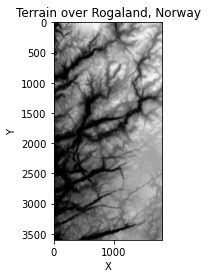

In [86]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
#terrain1 = imread('SRTM_data_Norway_1.tif')
terrain1 = imread('n59_e006_1arc_v3.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Rogaland, Norway')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.


Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.


Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).



### Answer

In this more practical problem, we are to experiment with regression methods for fitting a real world landscape. A vital part is to compare the different methods implemented earlier, and try to find the best method (with associated hyperparameters) that gives as good as possible fit to the landscape. It is important to clarify that the optimal model and parameters for fitting this landscape are independent from those obtained by fitting the FrankeFunction. The idea though, remains the same. We run cross-validation for the regression methods, and perform a search over model complexity and regularization terms to find the best model combination for *this particular problem*.

The landscape to fit constitutes a high-dimensional dataset, especially when fitting polynomial features to the grid points. Hence, evaluating a fit on the entire landscape could be computationally very expensive, especially for high polynomial degrees. Thus, when fitting high order polynomials we select a limited, coherent part of the landscape to fit our model to. 

We perform the same scaling as in the previous exercises (that is subtracting the mean). The error is as usual evaluated on the scaled data. However, when we are going to visualize our fitted model we need to rescale it back to original scale by adding the mean. This is done after the prediction and error evaluation.

Since our goal is to fit a single, specific landscape - and since we have already verified that our implementation of regression works for a "vanilla landscape" (FrankeFunction) - we are not going to split into train and test sets. Instead, we fit and predict on the same data of the landscape. Cross-validation combined with grid search will automatically split the input data into folds and find the optimal parameters. 

In [150]:
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

NameError: name 'ConvergenceWarning' is not defined

In [289]:
class RegressionModel:
    """Regression model that fits data on FrankeFunction, 
    and then predicts the shape of topographic data.
    
    """
    def __init__(self, z, model, deg, lmb=0, lambdas=None, x_from=0, x_to=-1, y_from=0, y_to=-1):
        assert x_to <= z.shape[0]
        assert y_to <= z.shape[1]
        self.z = z[x_from:x_to, y_from:y_to] # Sliced image matrix
        self.x = np.arange(self.z.shape[1]) # columns are x-coords
        self.xshape = self.x.shape
        self.y = np.arange(self.z.shape[0]) # rows are y-coords
        self.yshape = self.y.shape
        
        self.deg = deg
        self.lmb = lmb
        self.lambdas = lambdas
        self.model_name = model.__name__
        self.gridsearch = False
        
        if model==LinearRegression:
            self.model = model(fit_intercept=False)
        else:
            self.model = model(lmb, fit_intercept=False)
        
    def reshape_xyz(self, x, y, z):
        """Reshape 1D input arrays to meshgrid, and stack input vectors 
        for use in design matrix. Flatten output vector to allow fitting.
        
        Args:
            x (array): x-coordinate vector
            y (array): y-coordinate vector
            z (array): 2D output array
            
        Returns:
            x (array): 2D-reshaped x-coordinate
            y (array): 2D-reshaped y-coordinate
            x_y (array): stacked input vectors
            z_1d (array): flattened output array
            
        """
        x, y = np.meshgrid(self.x, self.y)

        x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
        y_1d = np.ravel(y).reshape(np.size(y), 1)
        x_y = np.hstack((x_1d, y_1d))
        z_1d = np.ravel(z)

        return x, y, x_y, z_1d

    
    def design_and_scale(self, x, y, z):
        x, y, x_y, z_1d = self.reshape_xyz(x, y, z)
        
        std = StandardScaler(with_std=False)
        x_y = std.fit_transform(x_y)
        X_scaled = create_X(x_y[:,0], x_y[:,1], self.deg)
        #X_scaled = std.fit_transform(X)
        z_mean = np.mean(z_1d, axis=0)
        
        return X_scaled, z_1d, z_mean
    
    def cross_validation(self, X, z, k):
        k_fold = KFold(n_splits = k)
    
        self.model.fit(X, z)
        z_pred = self.model.predict(X)

        # Scikit CV to get mse score
        estimated_mse = cross_val_score(self.model, X, z, scoring='neg_mean_squared_error', cv=k_fold)
        mse_model = np.mean(-estimated_mse)
        
        return z_pred, mse_model
    
    
    def cv_gridsearch(self, X, z, k):
        from sklearn.model_selection import GridSearchCV
        assert 'alpha' in [key for key in self.model.get_params()], \
                    f'Model {self.model} has no regularization parameter.'
        self.gridsearch = True
    
        k_fold = KFold(n_splits = k)
        
        gridsearch = GridSearchCV(estimator=self.model, param_grid=dict(alpha=self.lambdas), cv=k_fold)
        
        gridsearch.fit(X, z)
        z_pred = gridsearch.predict(X)

        self.best_lambda = gridsearch.best_estimator_.alpha
        print('Best lambda:', self.best_lambda)
        mse_pred = MSE(z, z_pred)
        
        return z_pred, mse_pred
    
    def plot_fit(self, x, y, z_true, z_pred):
        """Plot true z from input design matrix X_plot, and 
        also a predicted z (of same shape as true z).
        
        Args:
            X_plot: Design matrix of input data to plot
            z_true: Target values of input data
            z_pred: Predicted targets, calculated by a regression method
        
        """
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[12,12])
        
        
        # Transform z_true to 2D
        z_true = z_true.reshape(self.yshape[0], self.xshape[0]) # y correspond to rows, x to columns
        
        # Plot the surface.
        surf = ax.plot_surface(x, y, z_true, cmap=cm.coolwarm, alpha=0.5, linewidth=0, antialiased=False)       
        
        if z_pred is not None:
            z_pred = z_pred.reshape(self.yshape[0], self.xshape[0]) # Transform z_pred to 2D
            surf_pred = ax.plot_surface(x, y, z_pred, cmap='viridis', alpha=0.8, linewidth=0, antialiased=False)
            fig.colorbar(surf_pred, shrink=0.5, aspect=10)
        
        # Customize the axes
        ax.set(xlabel='x', ylabel='y', zlabel='z')
        if self.gridsearch:
            ax.set_title(label=f'{self.model_name} fit of landscape in Rogaland, polynomial degree {self.deg}, \
            $\lambda$={self.best_lambda}', fontdict={'fontsize':15})
        else:
            ax.set_title(label=f'{self.model_name} fit of landscape in Rogaland, polynomial degree {self.deg}', \
                            fontdict={'fontsize':15})
        ax.view_init(25, 35)
        ax.zaxis.set_major_locator(LinearLocator(6))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=10)
        plt.show()

In [290]:
def run_terrain_model(model, degree, lambdas, lmb=1, k=10, gridsearch=False):
    
    terrain = RegressionModel(terrain1, model, degree, lmb=lmb, lambdas=lambdas, \
                              x_from=1000, x_to=1300, y_from=1000, y_to=1200)
    # 2000, 2200, 1000, 1100
    
    x, y, x_y, z_1d = terrain.reshape_xyz(terrain.x, terrain.y, terrain.z)
    X_scaled, z_1d, z_scaled = terrain.design_and_scale(terrain.x, terrain.y, terrain.z)

    if gridsearch:
        z_pred, mse_pred = terrain.cv_gridsearch(X_scaled, z_1d, k=k)
    else:
        z_pred, mse_pred = terrain.cross_validation(X_scaled, z_1d, k=k)
        
    terrain.plot_fit(x, y, z_1d, z_pred)
    
    return mse_pred

Best lambda: 0.0001


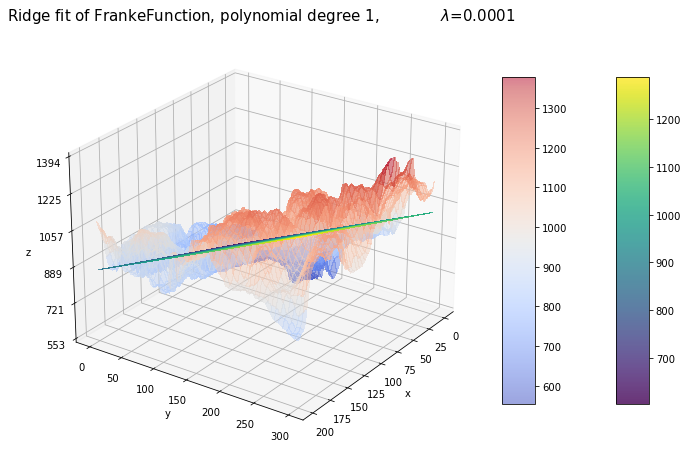

9939.624999740583
Best lambda: 200.923300256505


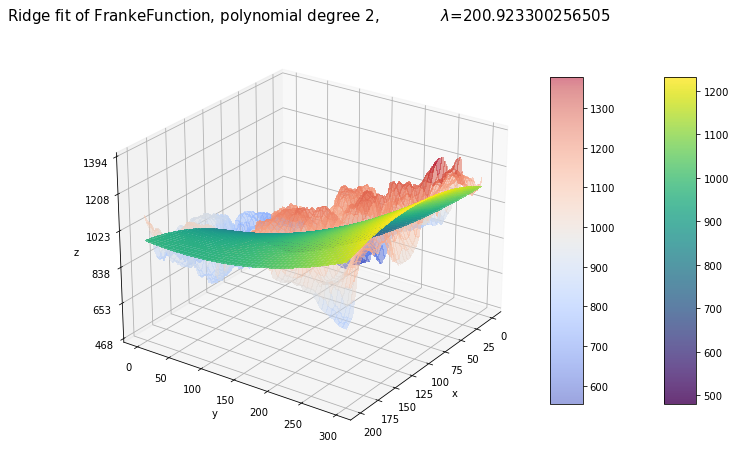

7184.119059909783
Best lambda: 351.11917342151344


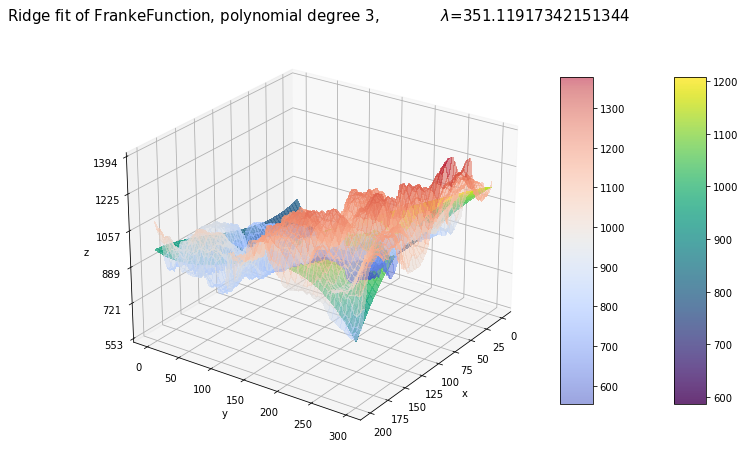

4144.193793127864
Best lambda: 0.0001


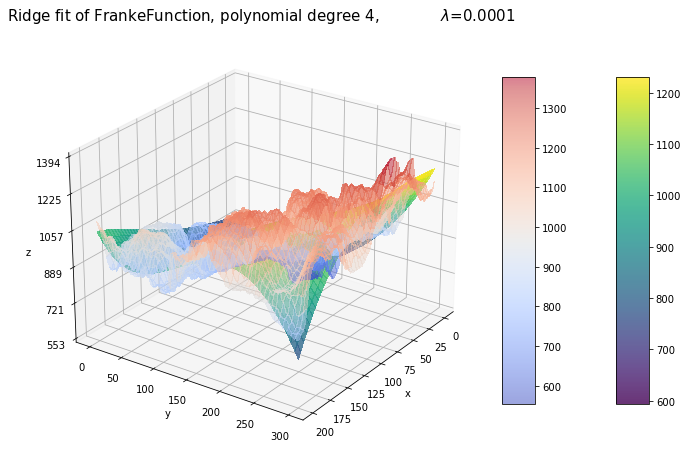

3750.196693317688
Best lambda: 45.34878508128591


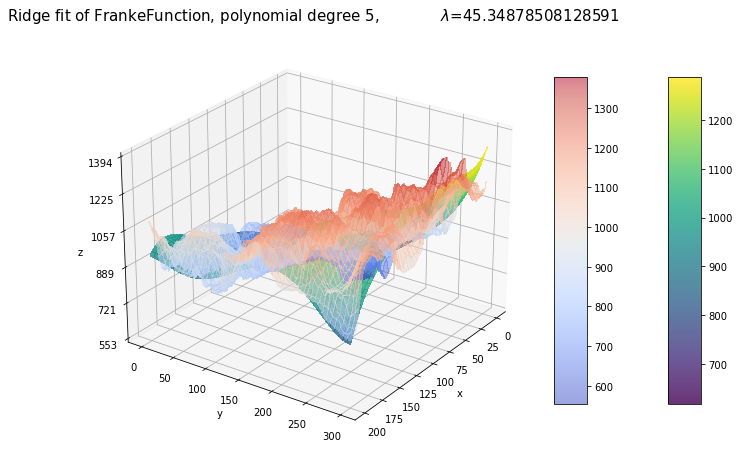

3430.083446360348
Best lambda: 21.544346900318867


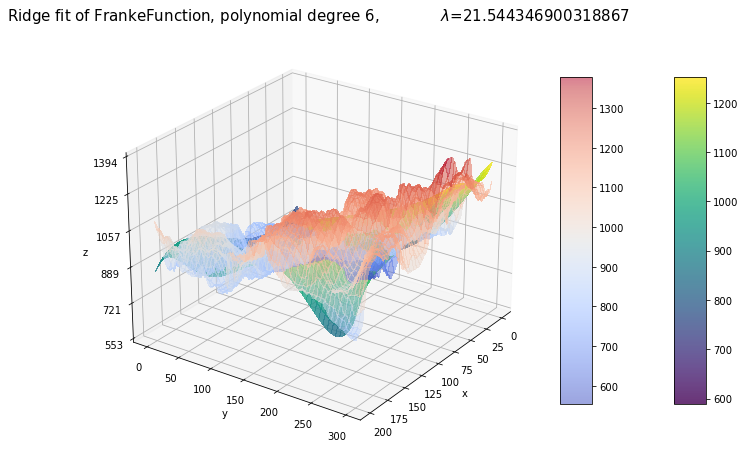

3155.757575495163
Best lambda: 0.0001


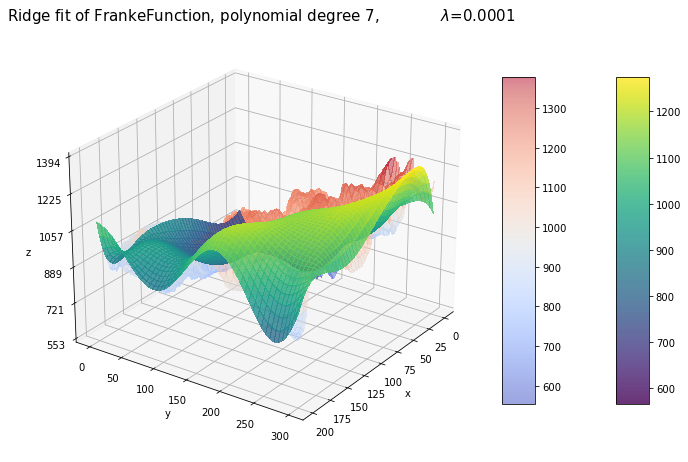

2570.1471695843306
Best lambda: 0.0001


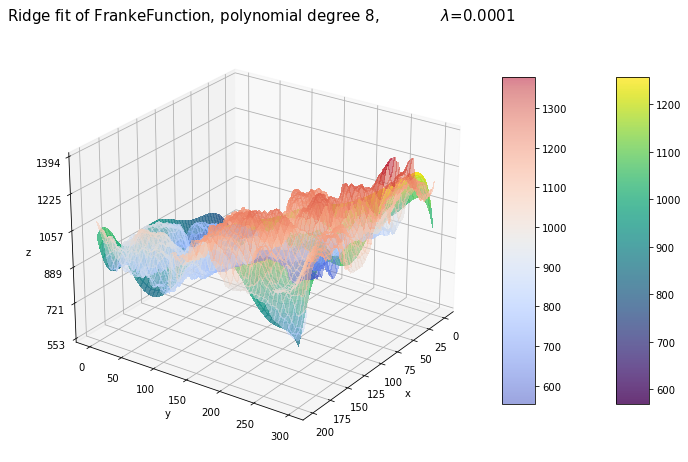

2384.4940872737952
Best lambda: 166.81005372000593


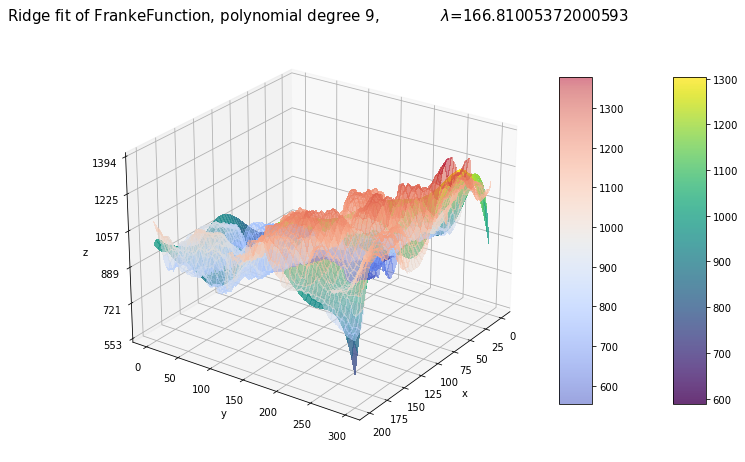

2191.3190497341207
Best lambda: 242.01282647943833


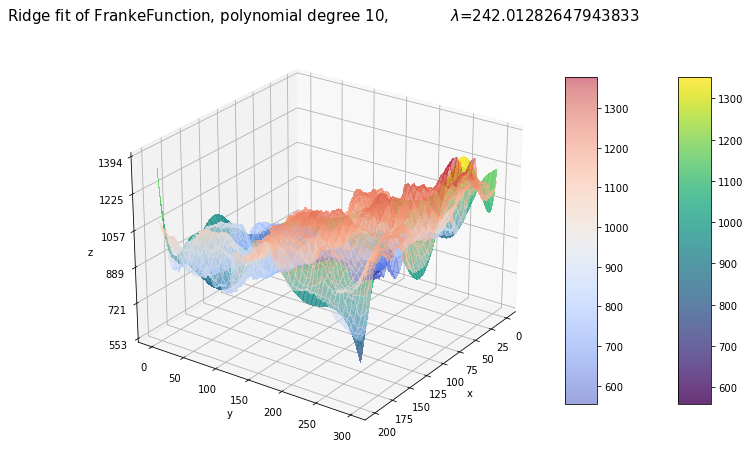

2095.482012764704
Best lambda: 65.79332246575683


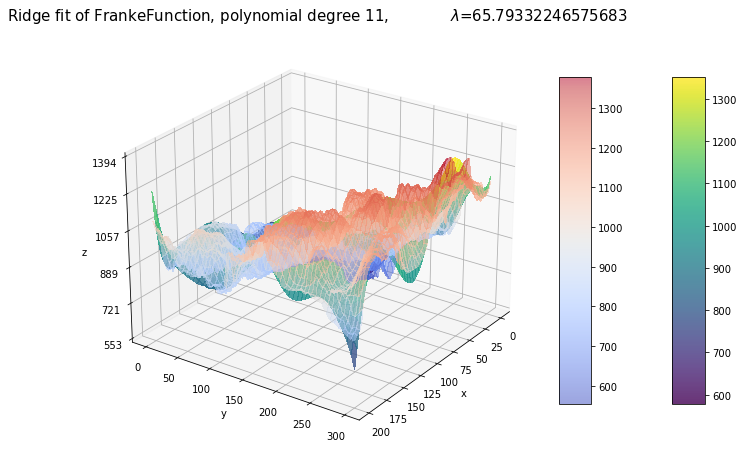

1686.4183998086241
Best lambda: 114.9756995397738


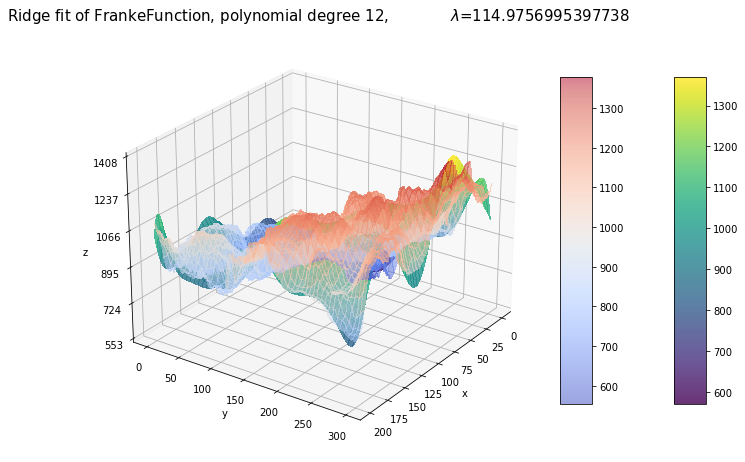

1625.35773979284
Best lambda: 0.0001


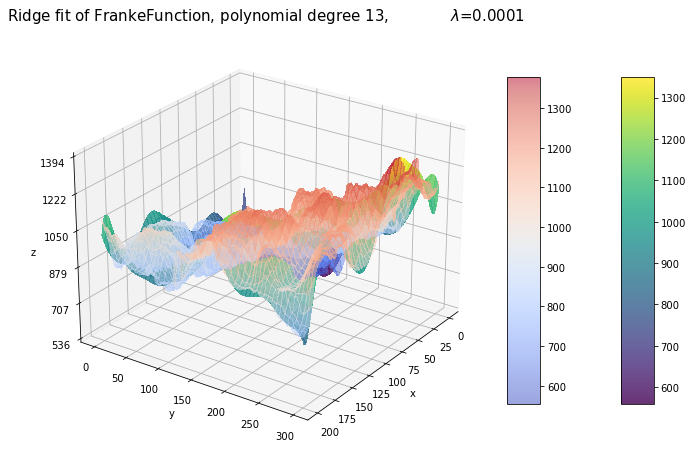

1431.3764415802852
Best lambda: 0.0001


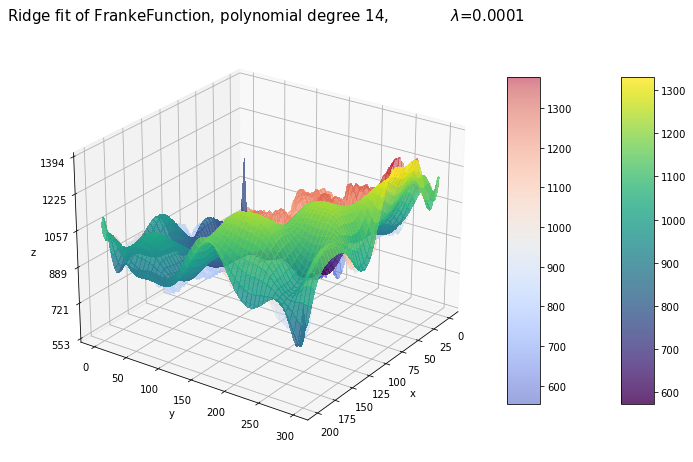

1264.41111038846


{1: 9939.624999740583,
 2: 7184.119059909783,
 3: 4144.193793127864,
 4: 3750.196693317688,
 5: 3430.083446360348,
 6: 3155.757575495163,
 7: 2570.1471695843306,
 8: 2384.4940872737952,
 9: 2191.3190497341207,
 10: 2095.482012764704,
 11: 1686.4183998086241,
 12: 1625.35773979284,
 13: 1431.3764415802852,
 14: 1264.41111038846}

In [291]:
lambdas = np.logspace(-4, 4, 100)
model = Ridge
deg = np.arange(1,15)

mse_degs = dict()
for d in deg:
    mse_degs[d] = 0

for d in deg:
    mse_pred = run_terrain_model(model, d, lambdas, gridsearch=True)
    mse_degs[d] = mse_pred
    print(mse_pred)
    
mse_degs

{1: 5}

#### Discussion - both fit and MSE

Fit:

9 PLOTS OLS

The nine plots above show some of the simulations using cross-validation with OLS. All rows show simulations of polynomial degree X, Y and Z from left to right, respectively. The upper row is for $k=5$ folds. There are significant differences between the model complexities, mainly the apparent fluctuations. The lowest model complexity, degree X, is actually the best model, in the sense that it holds the lowest MSE between the predicted output and the target function. Considering the other two models, there are certain areas within the domain where the fluctuations pose a more accurate fit to the terrain. On the other hand, there are also regions where the model deviates "too" much from the target function - as a result of severe fluctuations, particularly near the boundaries. The corresponding overfit is sufficient to make these higher complexity model worse fits than the low complexity model. Examining the middle and bottom rows, for 10 and 15 folds, respectively, reveal the same issue. The only improvement seems to be the MSE being a bit reduced using a larger number of folds. Apart from that, the main conclusion is that OLS suffers from too much overfitting. Let's investigate if Ridge and Lasso can mitigate this problem.

9 PLOTS RIDGE

For Ridge we have run cross-validation with grid search, allowing ```scikit``` to automatically find the best regularization parameter $\lambda$ for each polynomial degree. The result is shown in the 9 plots above, with same description as for OLS, but now also showing the $\lambda$ that gives the best model (minimum MSE) for a given polynomial degree.

Using cross-validation with Ridge, the MSE initially decreases at a high rate for higher model complexity, but this rate decreases over time. We eventually reach polynomial degrees where the MSE hardly gains any improvement. Hence, increasing the polynomial degrees beyond this point is not worth the extra computational cost it requires for including additional features. The three plots below show fitting the landscape with Ridge CV for polynomial degrees two, seven and fourteen. There is a clear difference between degree two on one hand and degree seven and fourteen on another. Despite the simulation proposing degree fourteen as a better model than degree seven, the differences are so minor that one should assess critically if it's worth the minor improvement at the extra computational cost.

9 PLOTS LASSO



|           | OLS |        |              | Ridge |        |              | Lasso |        |              |
| :-------- | :-- | :----- | :----------- | :---- | :----- | :----------- | :---- | :----- | :----------- |
|           | MSE | Degree | Lambda | MSE   | Degree | Lambda | MSE   | Degree | Lambda |
| CV (k=5)  |    | 2      | -            | 4     | 5      | 6            | 7     | 8      | 9            |
| CV (k=10) |    | 7      | -            | 5     | 4      | 3            | 2     | 1      | 8            |
| CV (k=15) |    | 7      | -            | 5     | 4      | 3            | 2     | 1      | 8            |


MSE:
The performance of the three regression methods is quantified in the table above. The values reflect the minimum estimated MSE obtained for a given k-fold. 

Generalization:
The simulations in this project have demonstrated how regression methods, combined with polynomial transformations, are capable of reproducing various irregular surfaces at a relatively high accuracy. Real life landscapes are examples of highly irregular surfaces, but applying polynomial features with regression has shown to produce a reasonable fit. An important note though, is that different landscapes are - yes, *different* - and the regression model fitted to our landscape sample would in all likelihood perform significantly worse on other types of landscapes. Consequently, it is a bad idea to generalize our fitted model to other landscapes. The model expects a certain correlation between input coordinates and elevation - which presumably is completely different for another geographic region.

Implementing a generalized model would require fitting and predicting a *certain* type of landscape, mapping characteristic parts of the landscape to a limited range of input coordinates. For example, to make a generalized fit of a fjord landscape would require assigning distinct parts (such as bottom valley, steepest hills, etc.) to a certain region of our input grid. This would allow testing our model on other fjords that show similar elevation characteristics on our coordinate grid.

<a id='apx'></a>
### Appendix

<a id='apx1'></a>
***Figure A1: Confidence interval, polynomial degree 5, 50x50 data points***
![alt](figs_v3/ex1_CI_deg5_n50.png)

<a id='apx2'></a>
***Figure A2: Bias variance tradeoff - up to polynomial degree 20***
![alt](figs_v3/ex2_bias_var_deg20.png)



## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here. 

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. Note that you can answer question by question and there is no need to structure your report as a scientific report with abstract, introduction, theory, results and discussions, conclusions etc. But you have the following elements in mind when you answer the various questions.


  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report. 



## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.